# Initialize

In [1]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics"
#%cd /mnt/project_mnt/teo_fs/rtorre/cernbox/git/GitHub/NormalizingFlows/NF4HEP/GenerativeModelsMetrics

/leonardo_scratch/fast/INF24_pmlhep_1/rtorre00/git/github/GenerativeModelsMetrics


/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-05-28 08:10:59.481084: Importing os...
2024-05-28 08:10:59.481260: Importing sys...
Visible devices: [0]
2024-05-28 08:10:59.481550: Importing timer from timeit...
2024-05-28 08:10:59.481629: Setting env variables for tf import (only device(s) [0] will be available)...
2024-05-28 08:10:59.481775: Importing numpy...
2024-05-28 08:10:59.812112: Importing matplotlib...
2024-05-28 08:11:00.353385: Importing h5py...
2024-05-28 08:11:00.603439: Importing importlib.util...
2024-05-28 08:11:00.603618: Importing json...
2024-05-28 08:11:00.603693: Importing pandas...
2024-05-28 08:11:01.731604: Importing random...
2024-05-28 08:11:01.731778: Importing scipy utils...
2024-05-28 08:11:02.730187: Importing subprocess...
2024-05-28 08:11:02.730367: Importing tensorflow...
Tensorflow version: 2.16.1
2024-05-28 08:11:12.836812: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-05-28 08:11:14.377072: Importing timeit...
2024-05-28 08:11:14.377181: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-05-28 08:11:25.054593: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-05-28 08:11:25.071464: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'> <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)


## Deformations

### 1 - $\mu$-deformation

In [5]:
eps = 0.5
dist_def_1 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "mean",
                                                        seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.08681052504107356 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.049945014994591475 s.
Computing HPD intervals...
HPD intervals computed in 3.759155721985735 s.
Computing HPD quotas...
HPD quotas computed in 4.110528767982032 s.
Plotting corner plot...


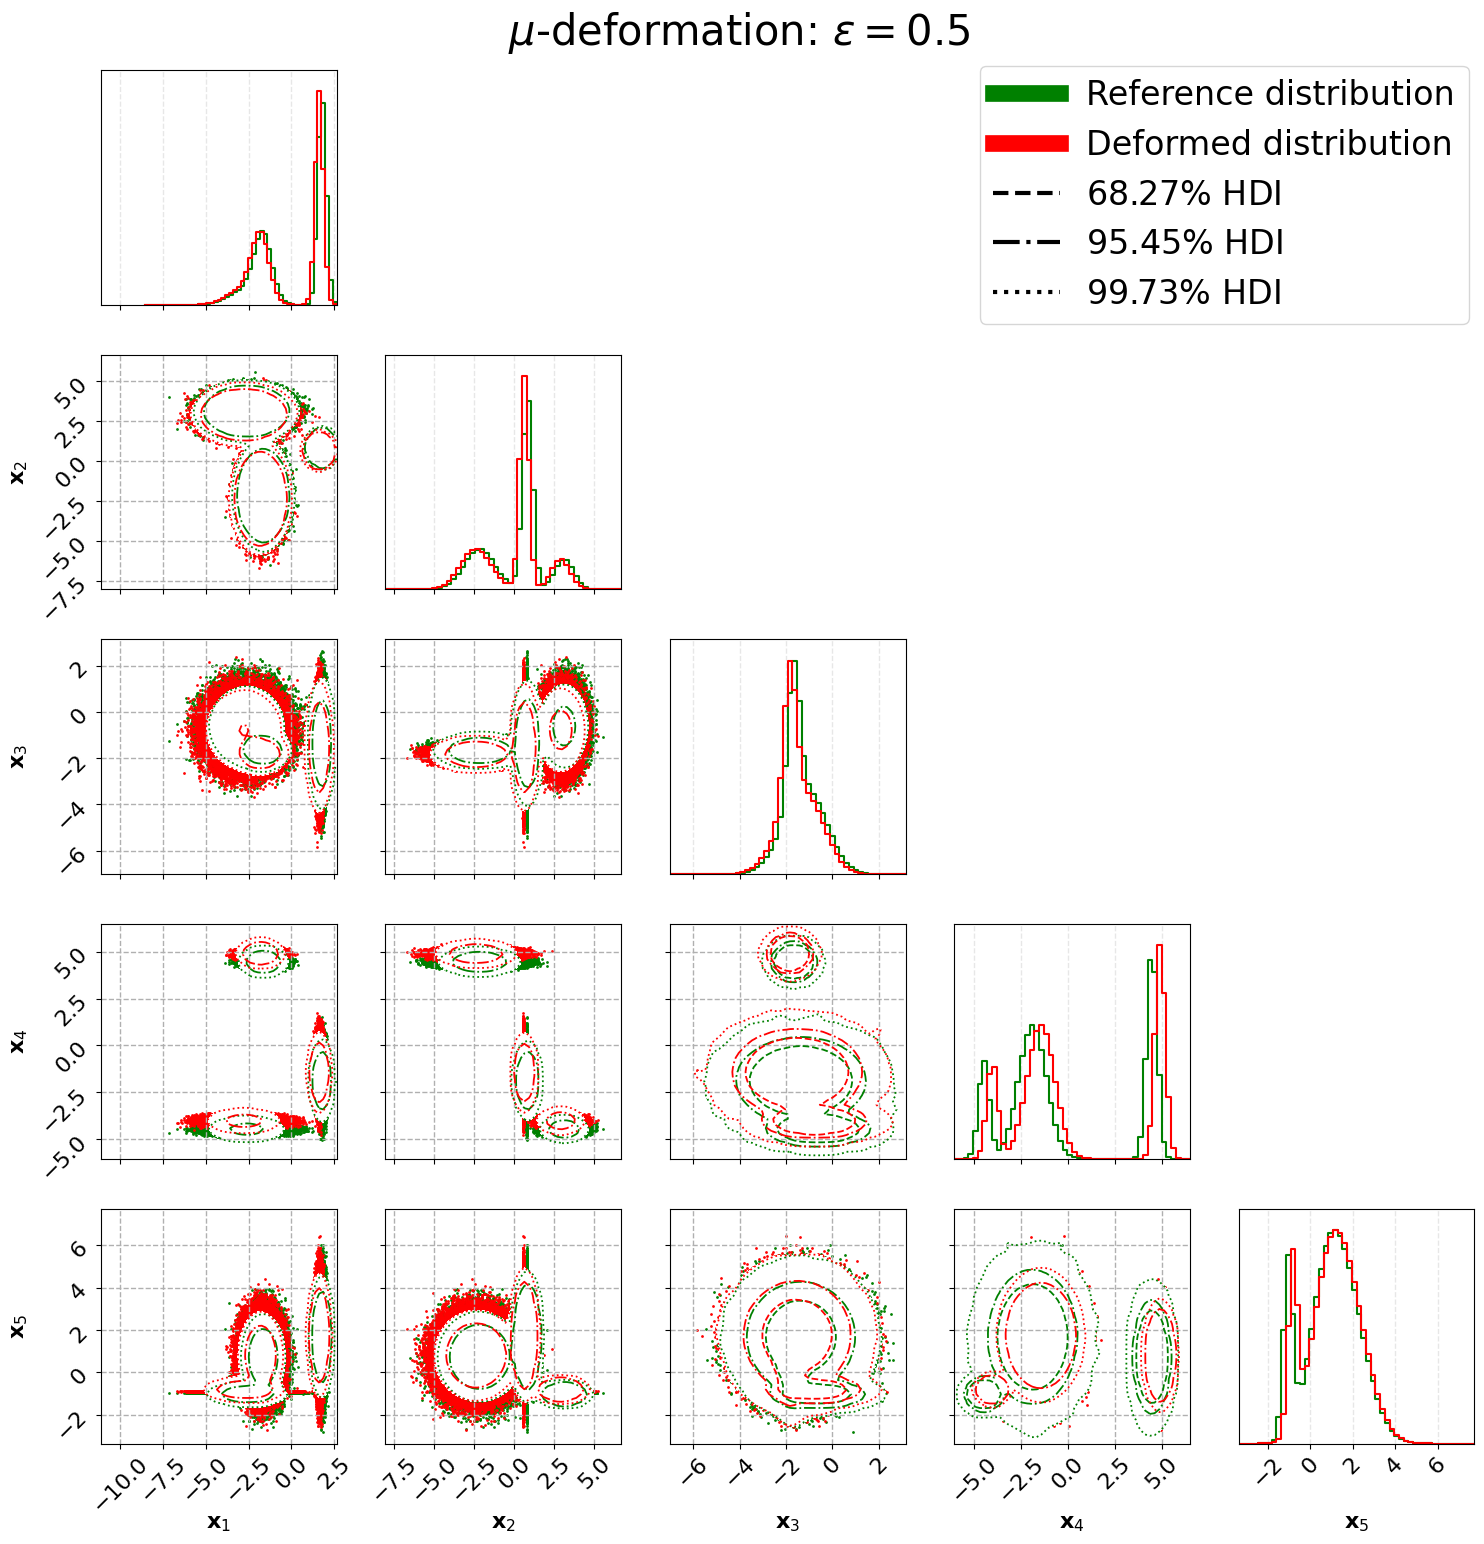

Plot done and saved in 32.87902680400293 s.


In [6]:
plot_corners(dist_1,
             dist_def_1,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mu$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_1.png",
             save = True,
             show = True)

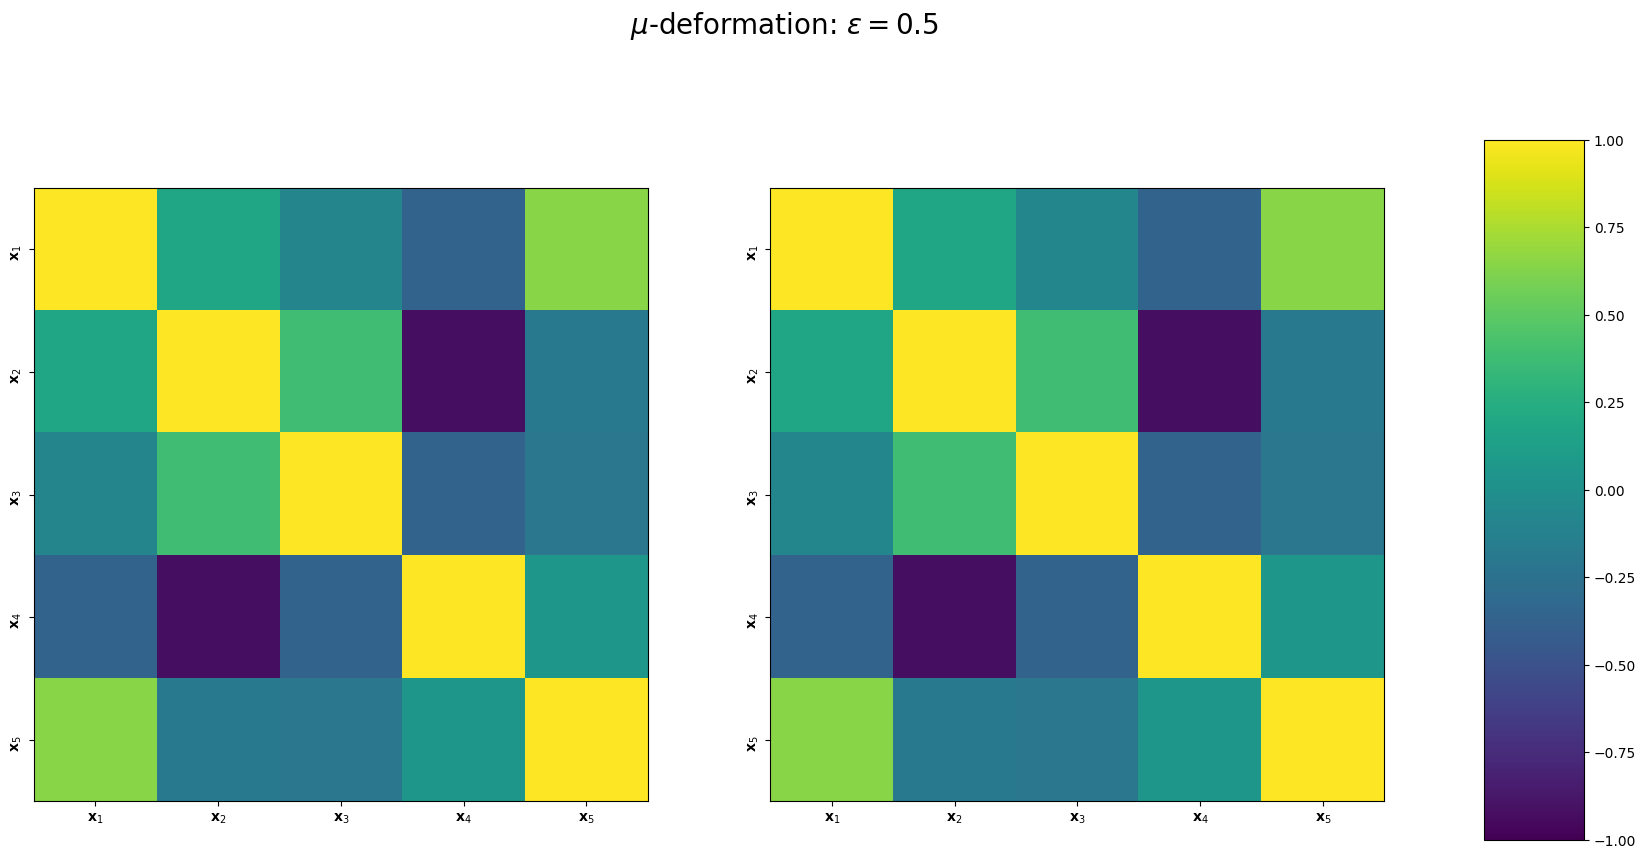

In [7]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_1, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_1.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mu$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 2 - $\Sigma_{ij}$-deformation

In [8]:
eps = 0.5
dist_def_2 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "cov_diag",
                                                        seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.05993237195070833 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.05697214399697259 s.
Computing HPD intervals...
HPD intervals computed in 3.3364335839869455 s.
Computing HPD quotas...
HPD quotas computed in 4.1158345429576 s.
Plotting corner plot...


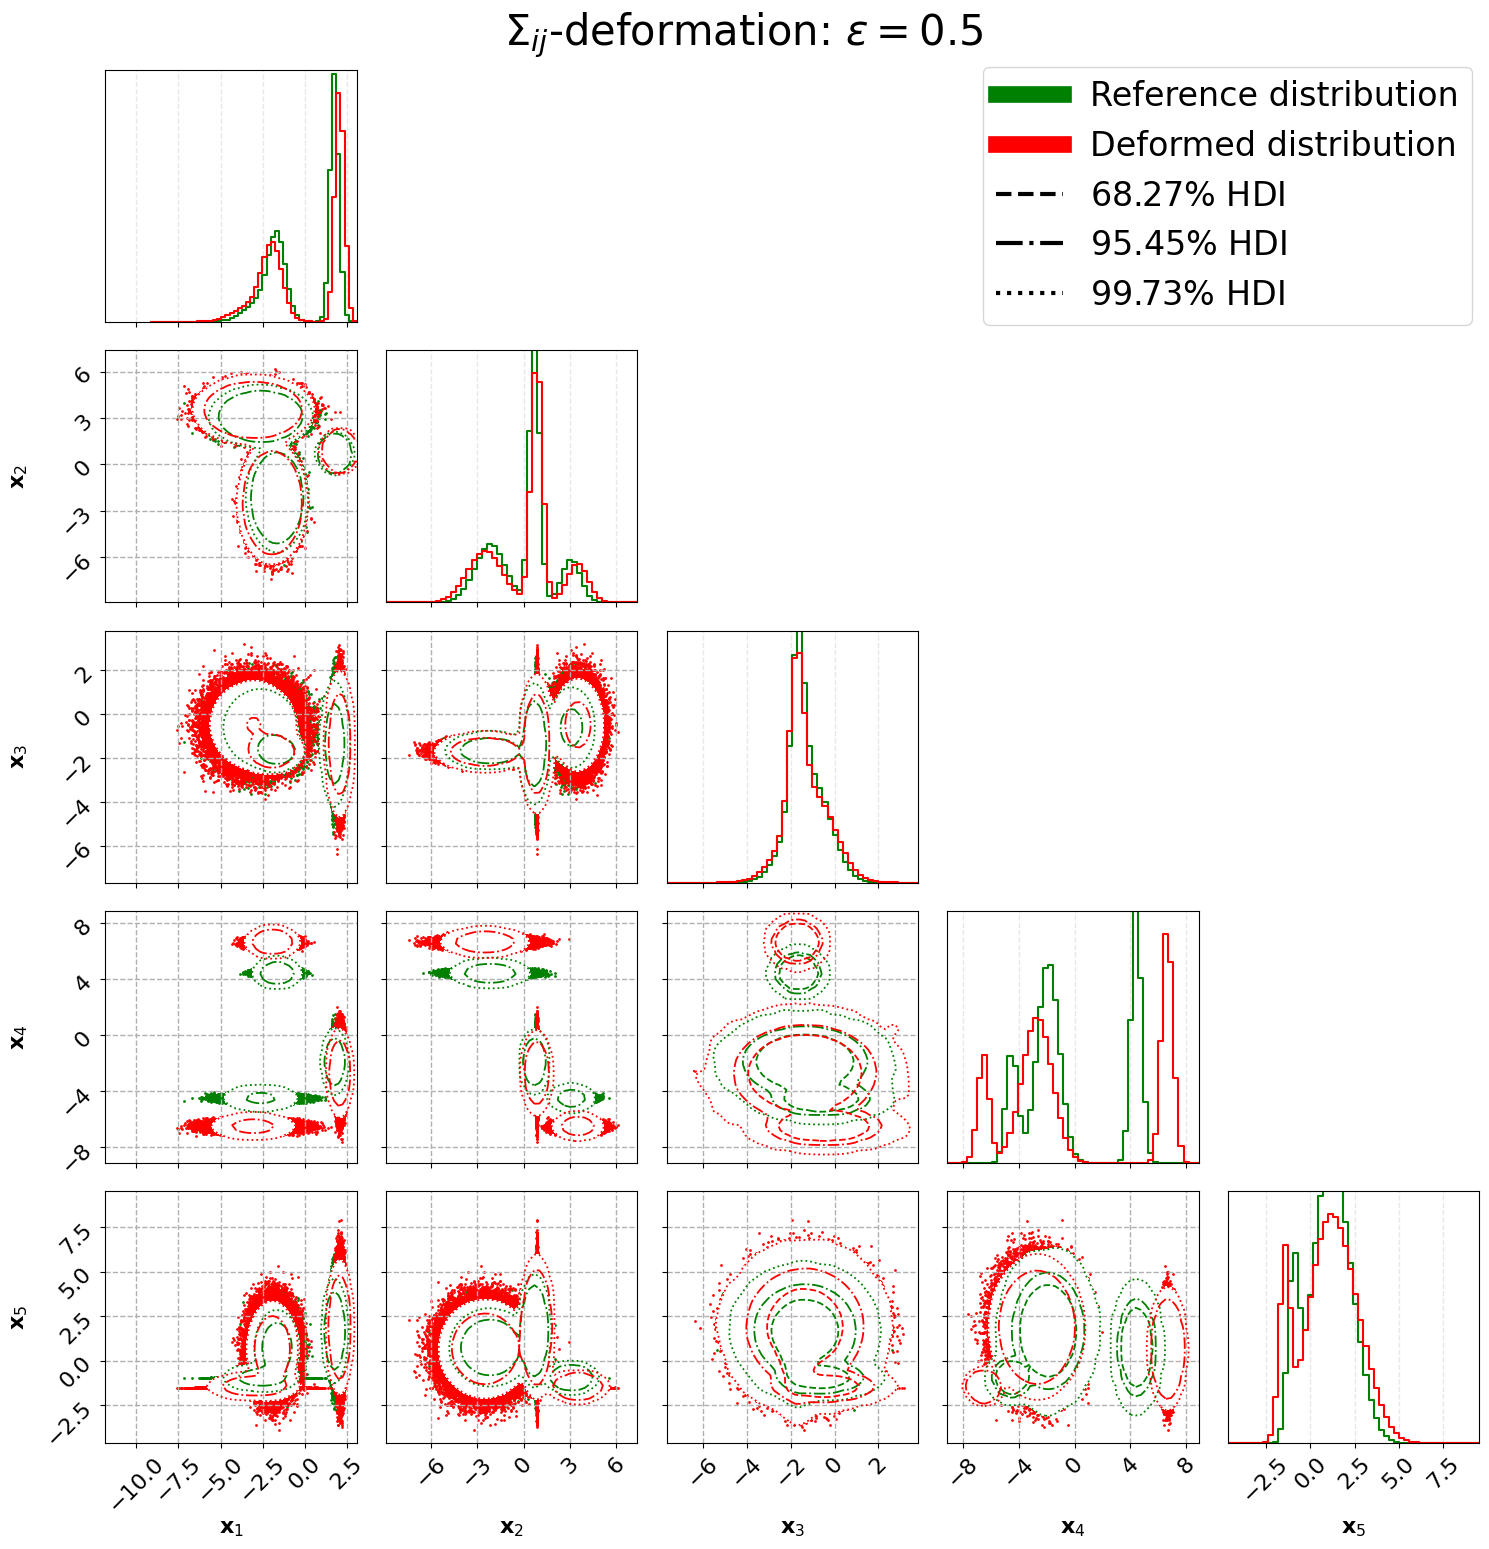

Plot done and saved in 32.22956994600827 s.


In [9]:
plot_corners(dist_1,
             dist_def_2,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_2.png",
             save = True,
             show = True)

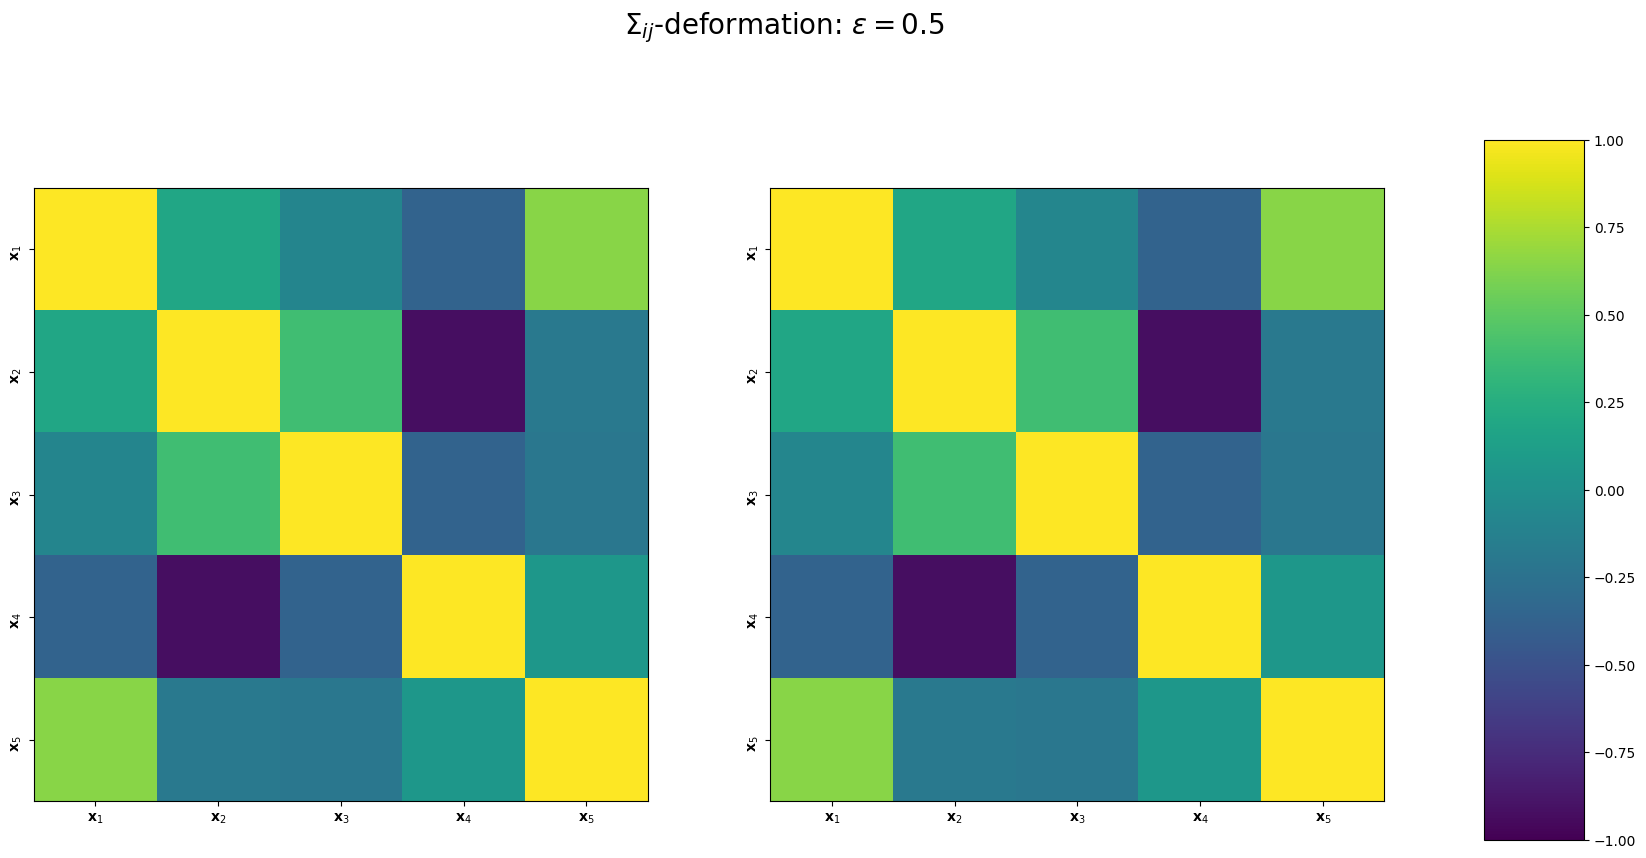

In [10]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_2, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_2.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{ij}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 3 - $\Sigma_{i\neq j}$-deformation

In [11]:
eps = 0.5
dist_def_3 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "cov_off_diag",
                                                        seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.07826029194984585 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.12860267999349162 s.
Computing HPD intervals...
HPD intervals computed in 11.203270900005009 s.
Computing HPD quotas...
HPD quotas computed in 4.310263380000833 s.
Plotting corner plot...


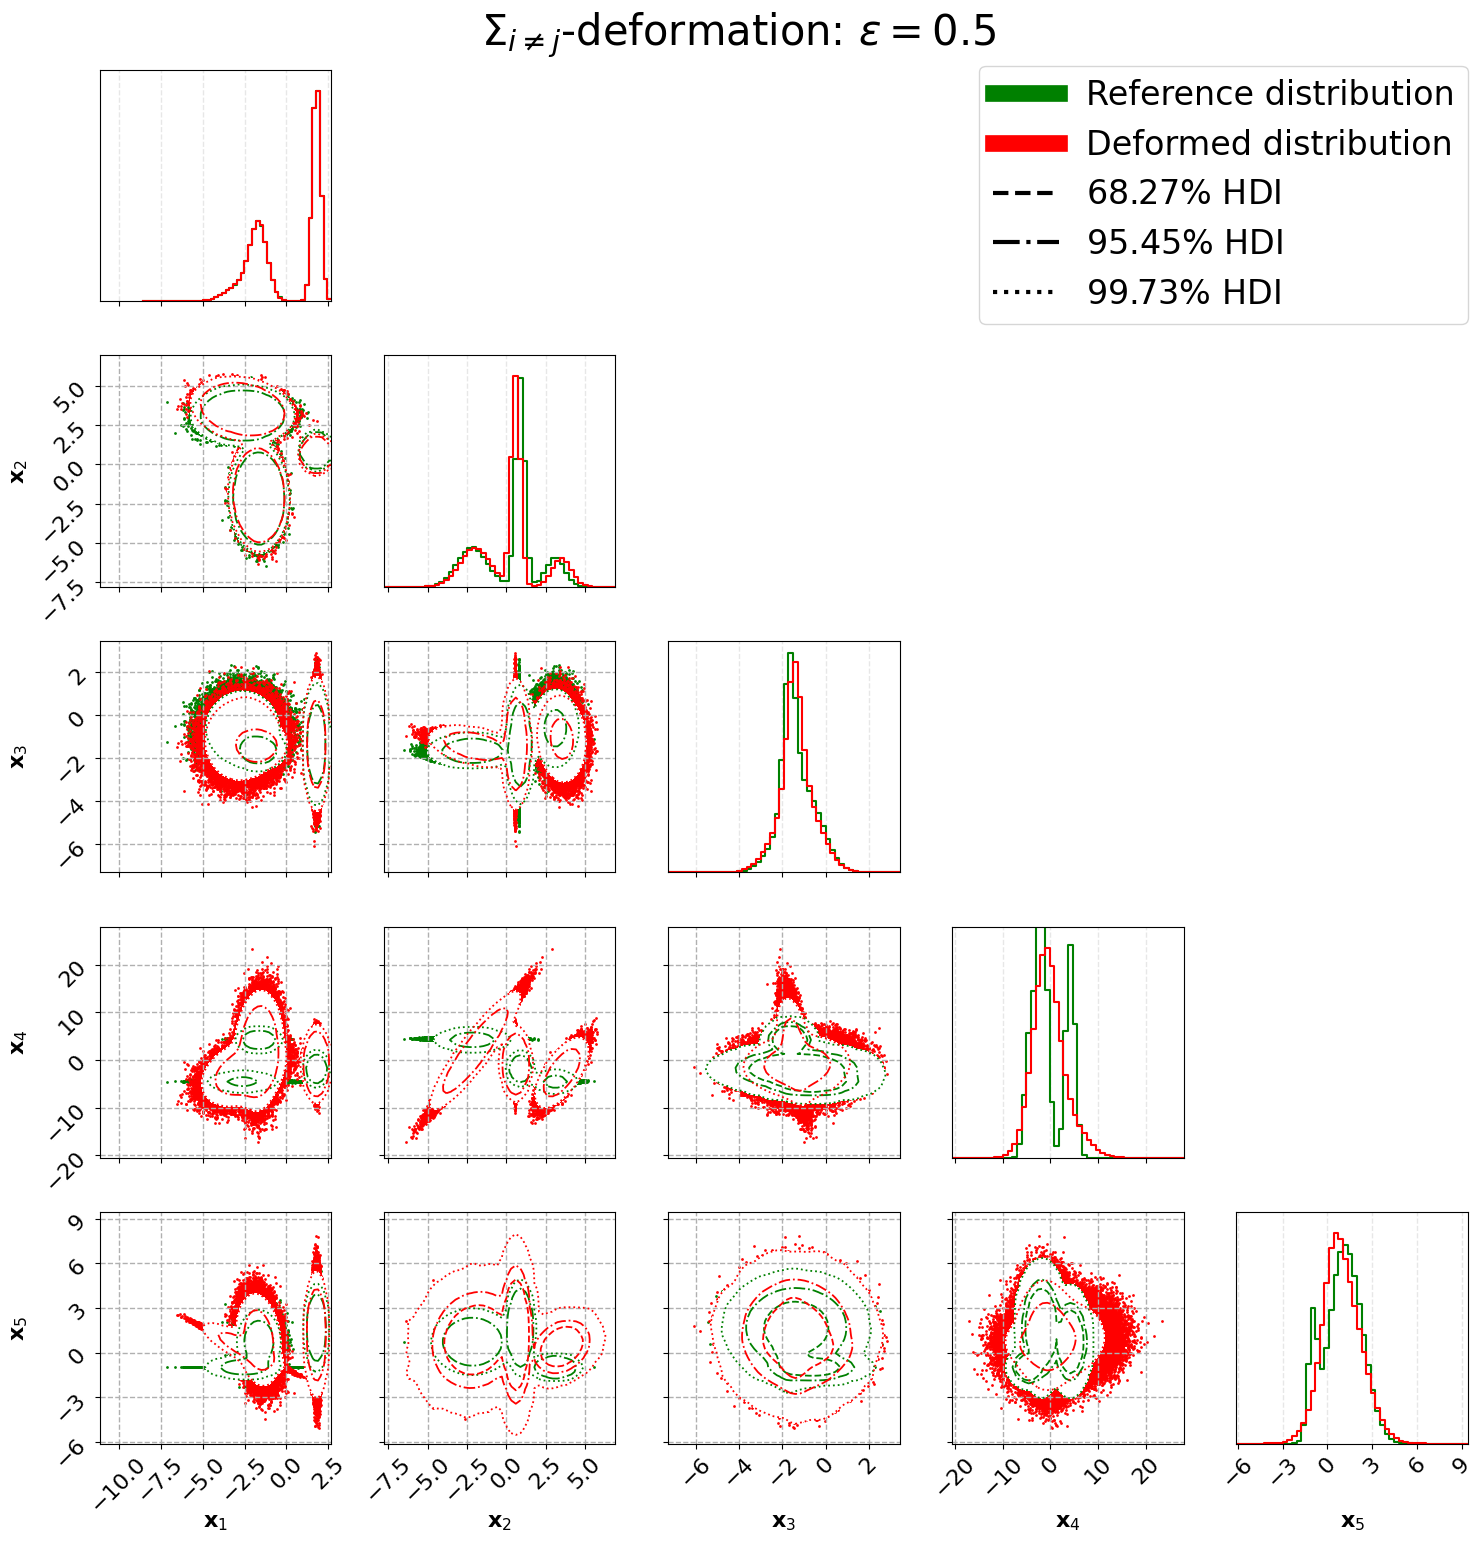

Plot done and saved in 42.153427800978534 s.


In [12]:
plot_corners(dist_1,
             dist_def_3,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_3.png",
             save = True,
             show = True)

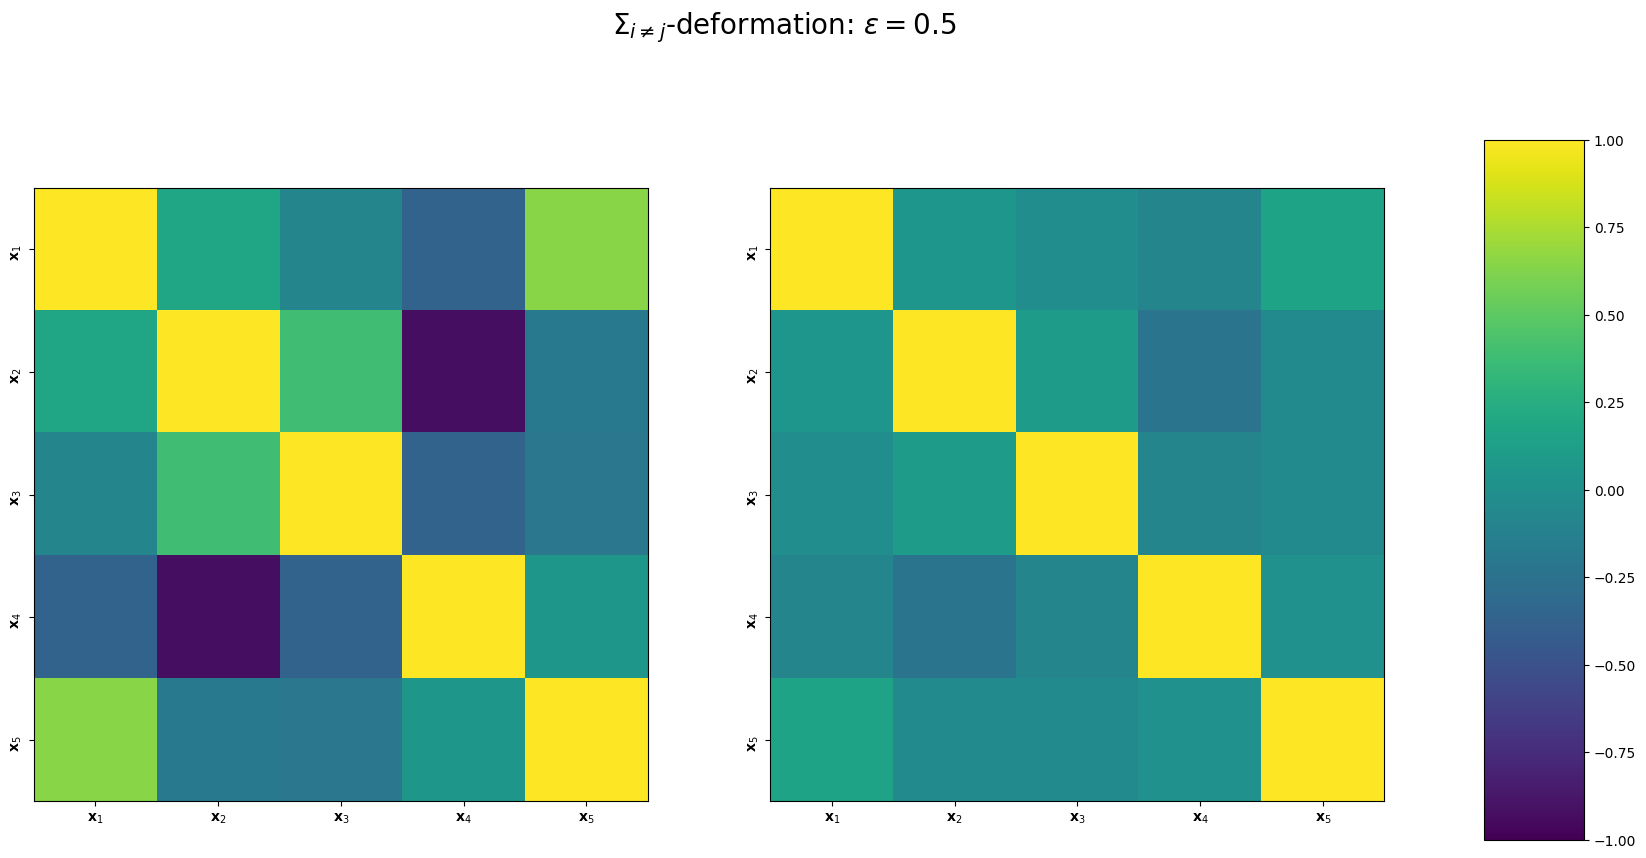

In [13]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_3, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_3.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\Sigma_{i\\neq j}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 4 - $\#^{+}$-deformation

In [14]:
eps = 0.1
dist_def_4 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "power_abs",
                                                        direction = "up")

Sampling from dist_1...
Sampling from dist_1 done in 0.08086282899603248 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.14658188103931025 s.
Computing HPD intervals...
HPD intervals computed in 7.9770094840205275 s.
Computing HPD quotas...
HPD quotas computed in 5.702203530992847 s.
Plotting corner plot...


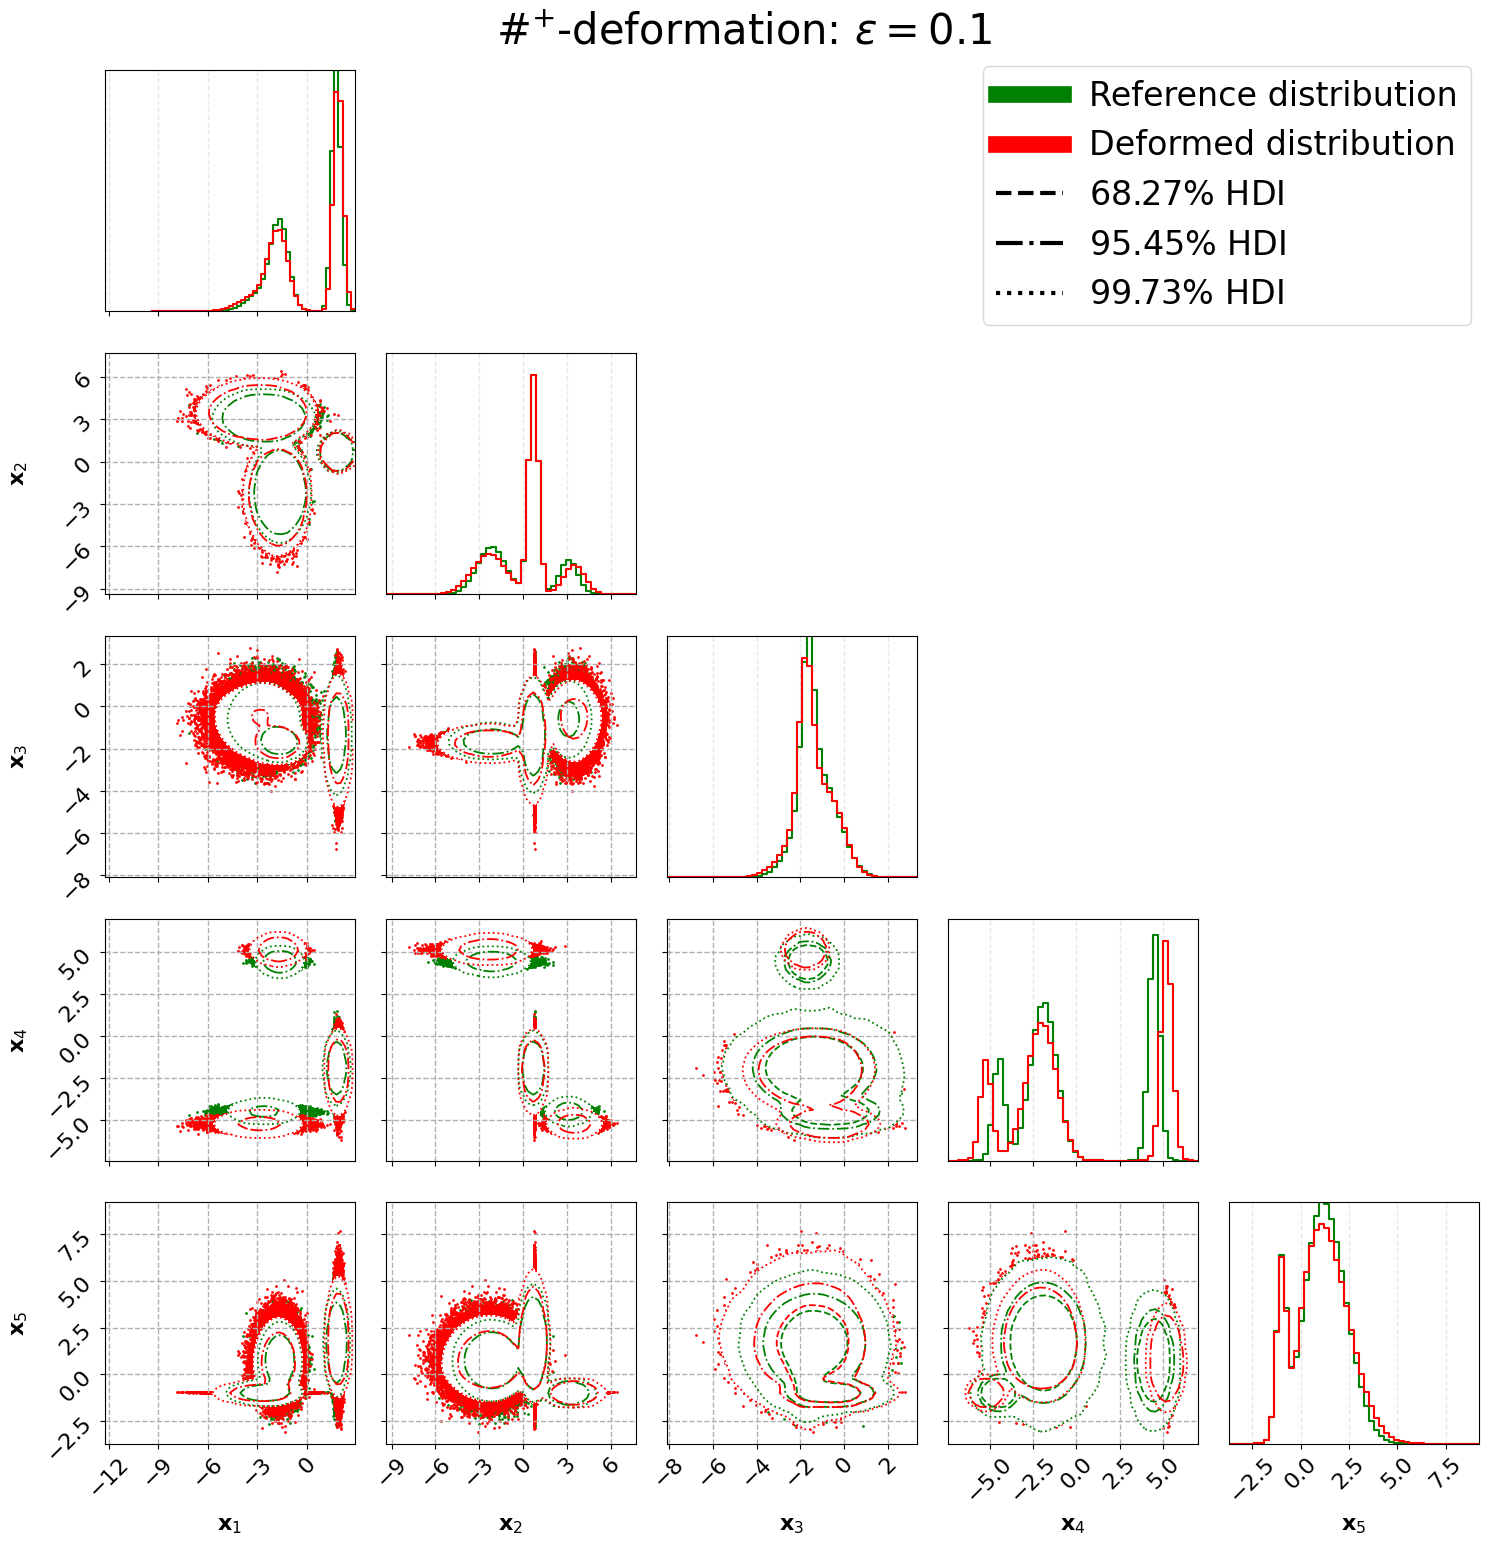

Plot done and saved in 40.66399657999864 s.


In [15]:
plot_corners(dist_1,
             dist_def_4,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\#^{+}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_4.png",
             save = True,
             show = True)

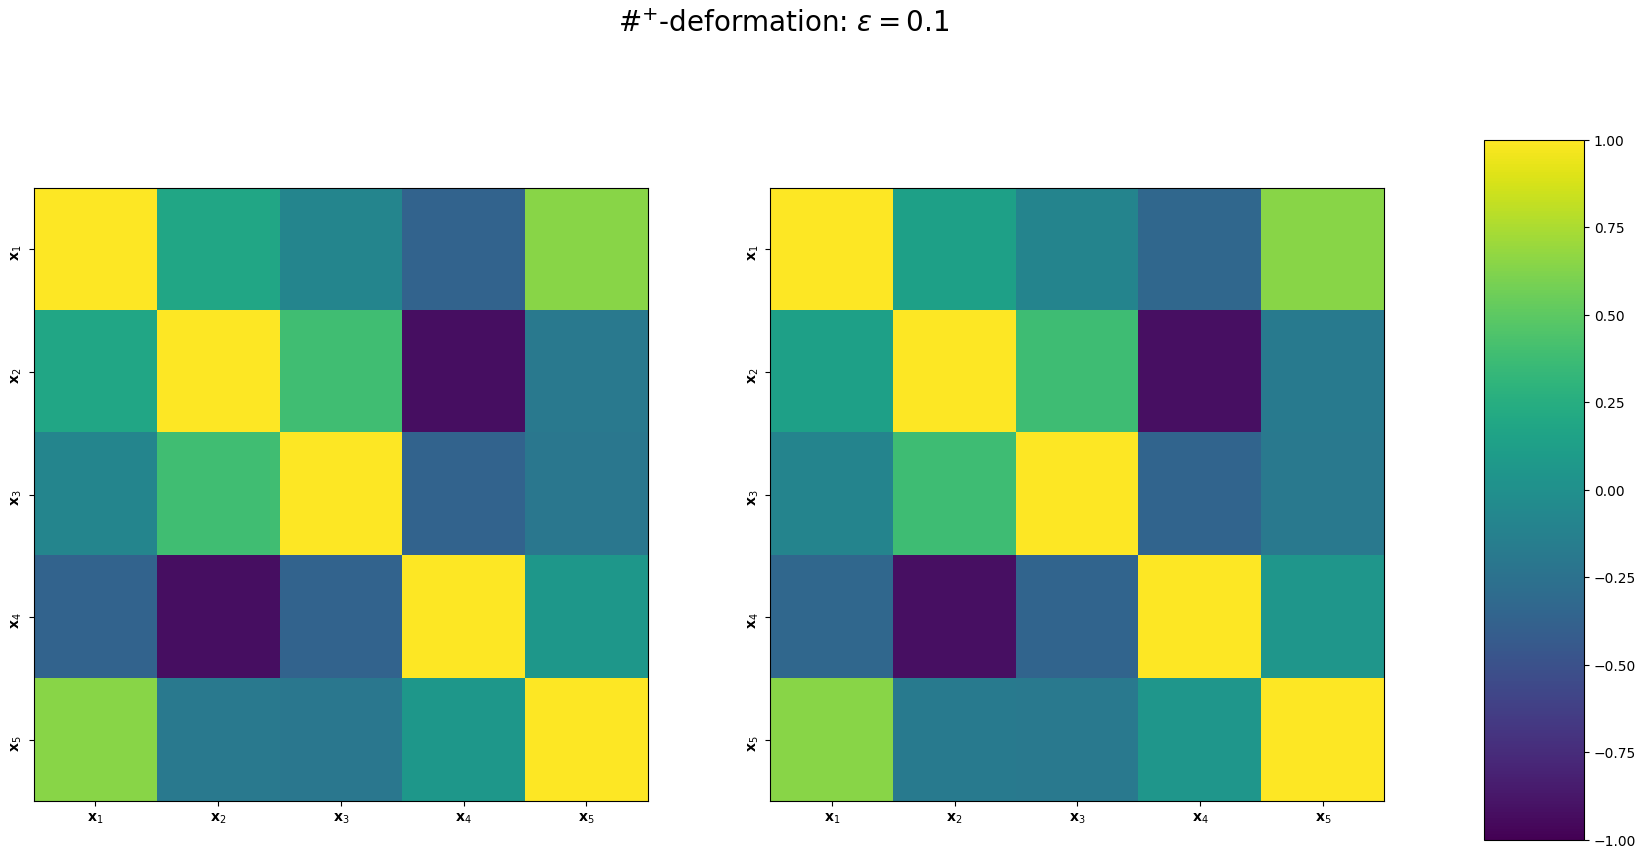

In [16]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_4, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_4.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\#^{+}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 5 - $\#^{+}$-deformation

In [17]:
eps = 0.1
dist_def_5 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "power_abs",
                                                        direction = "down")

Sampling from dist_1...
Sampling from dist_1 done in 0.0798517310176976 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.06353600096190348 s.
Computing HPD intervals...
HPD intervals computed in 6.181684868002776 s.
Computing HPD quotas...
HPD quotas computed in 4.40025785996113 s.
Plotting corner plot...


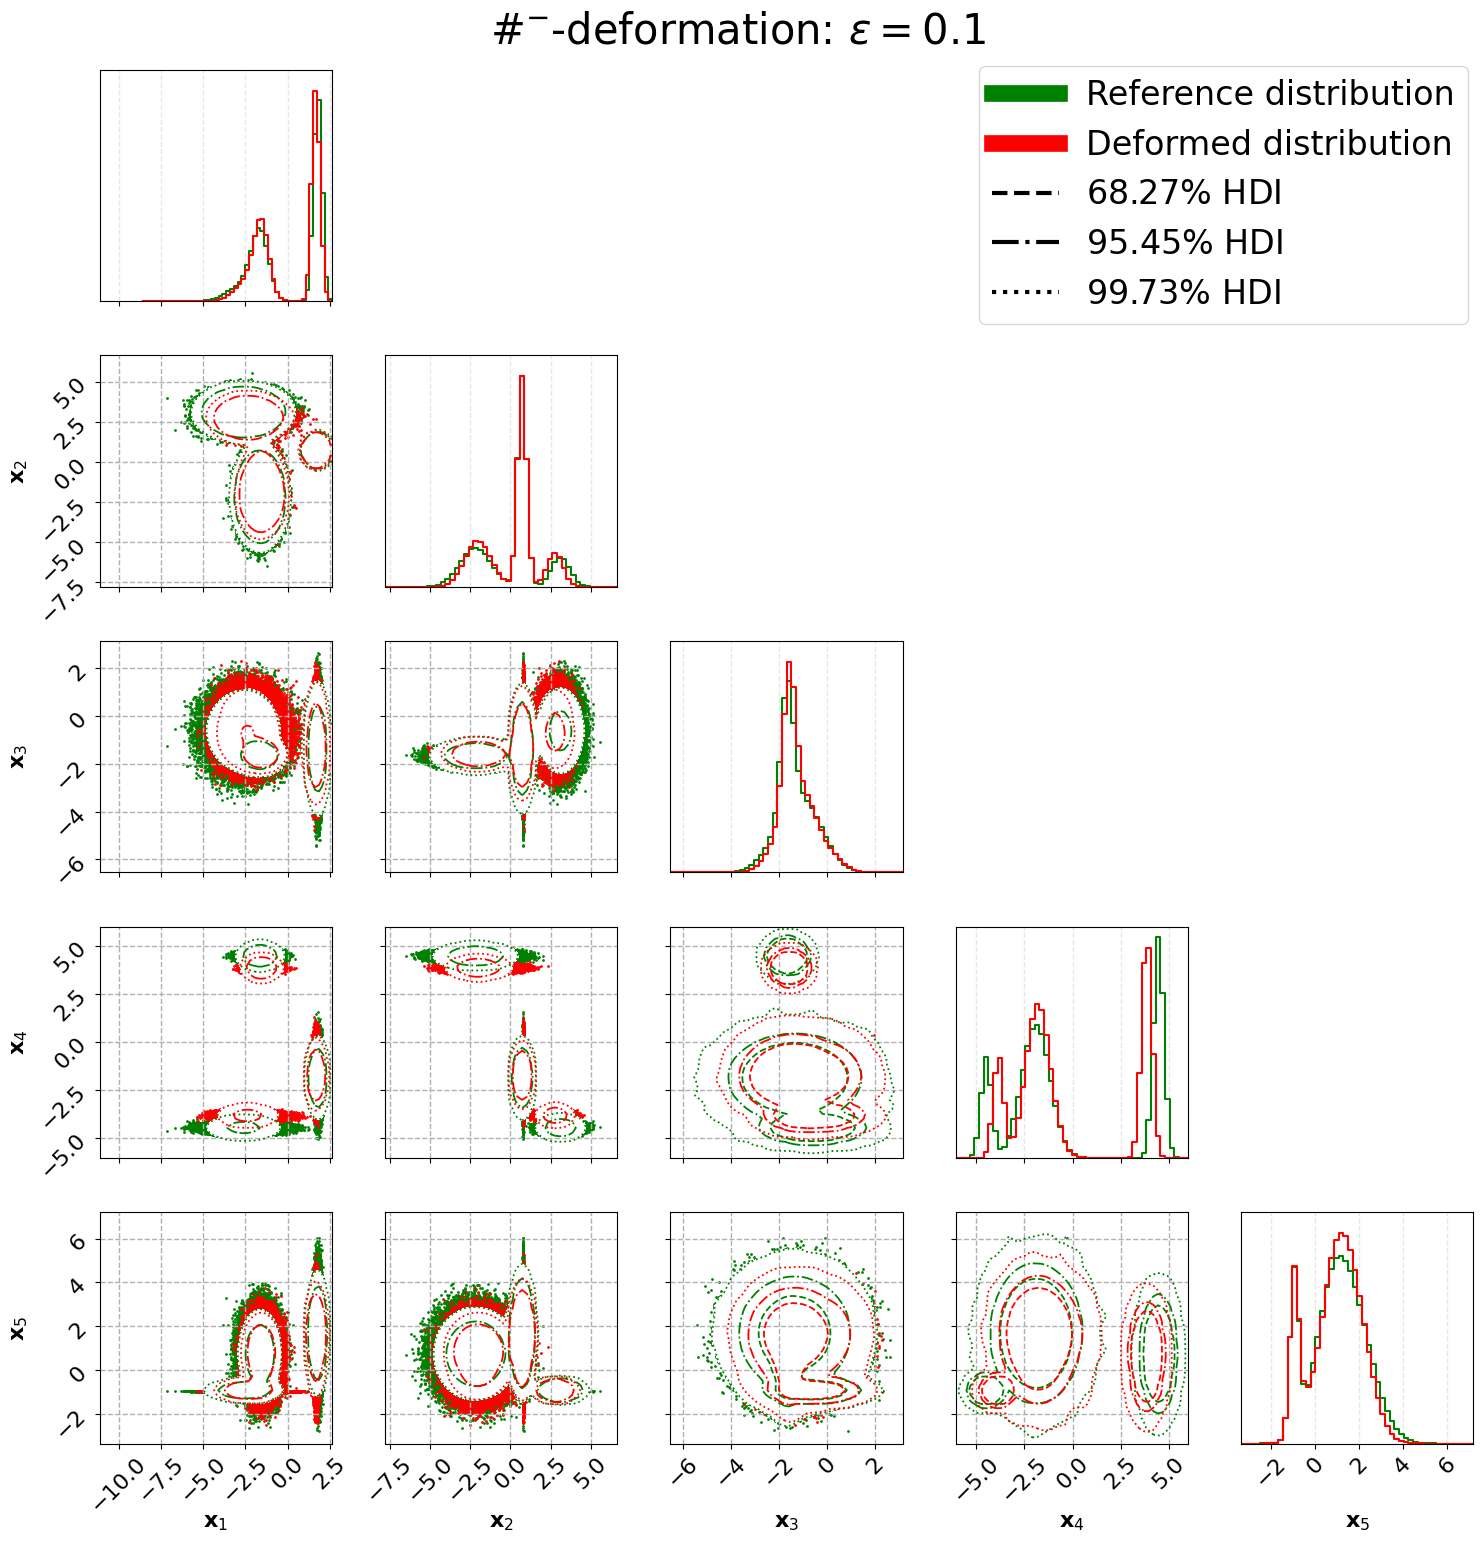

Plot done and saved in 36.77998338203179 s.


In [18]:
plot_corners(dist_1,
             dist_def_5,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_5.png",
             save = True,
             show = True)

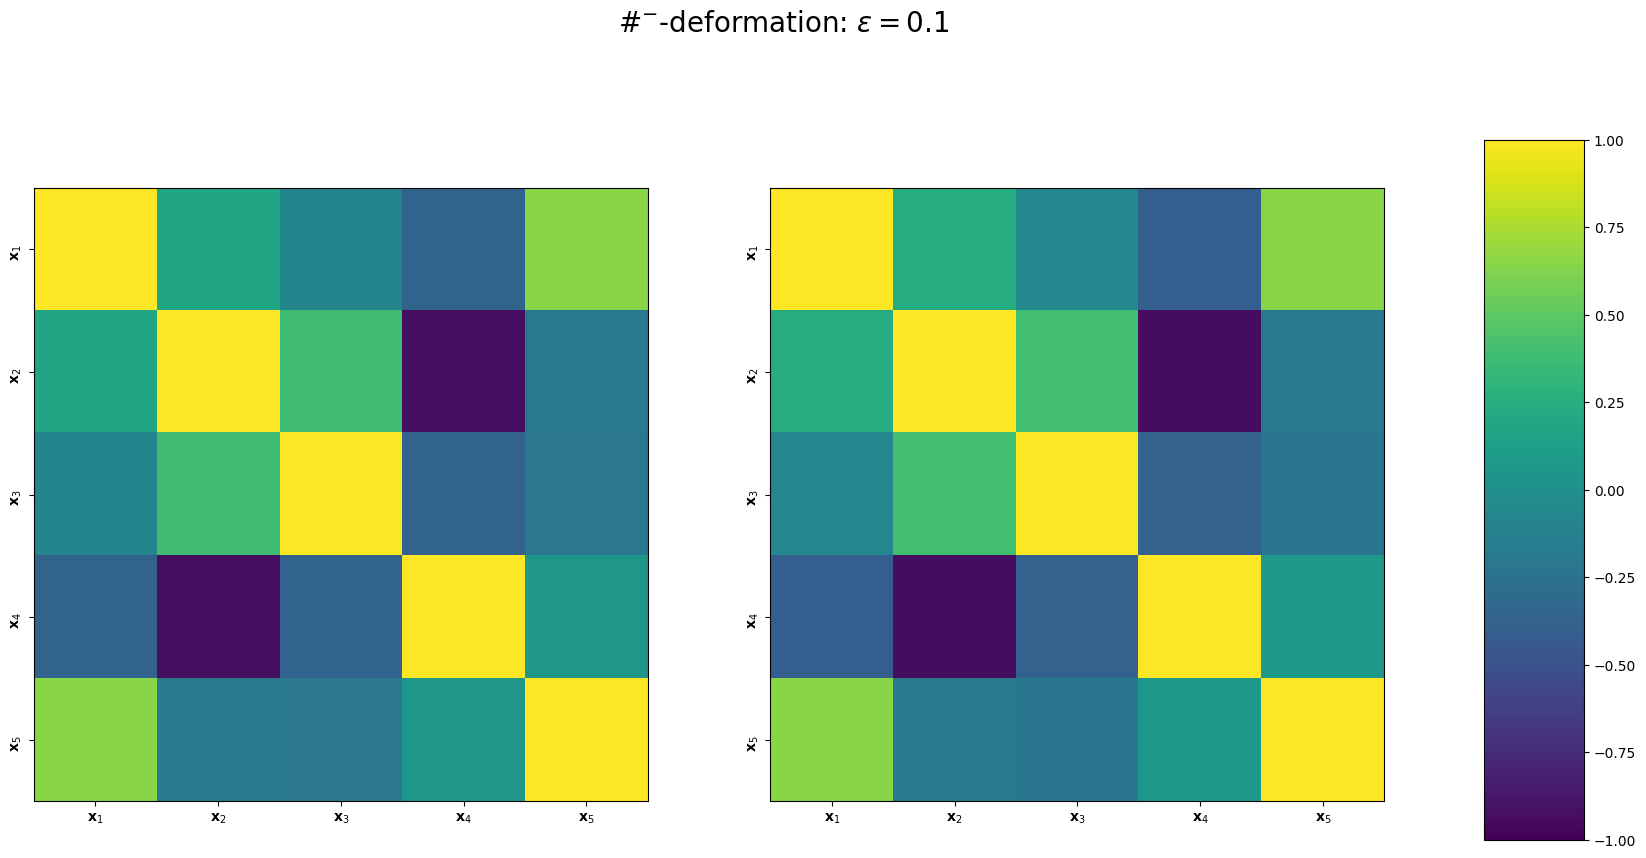

In [19]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_5, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_5.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\#^{-}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 6 - $\mathcal{N}$-deformation

In [20]:
eps = 0.5
dist_def_6 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "random",
                                                        shift_dist = "normal",
                                                        seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.0876687319832854 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.06395346100907773 s.
Computing HPD intervals...
HPD intervals computed in 8.780390573025215 s.
Computing HPD quotas...
HPD quotas computed in 4.317517896008212 s.
Plotting corner plot...


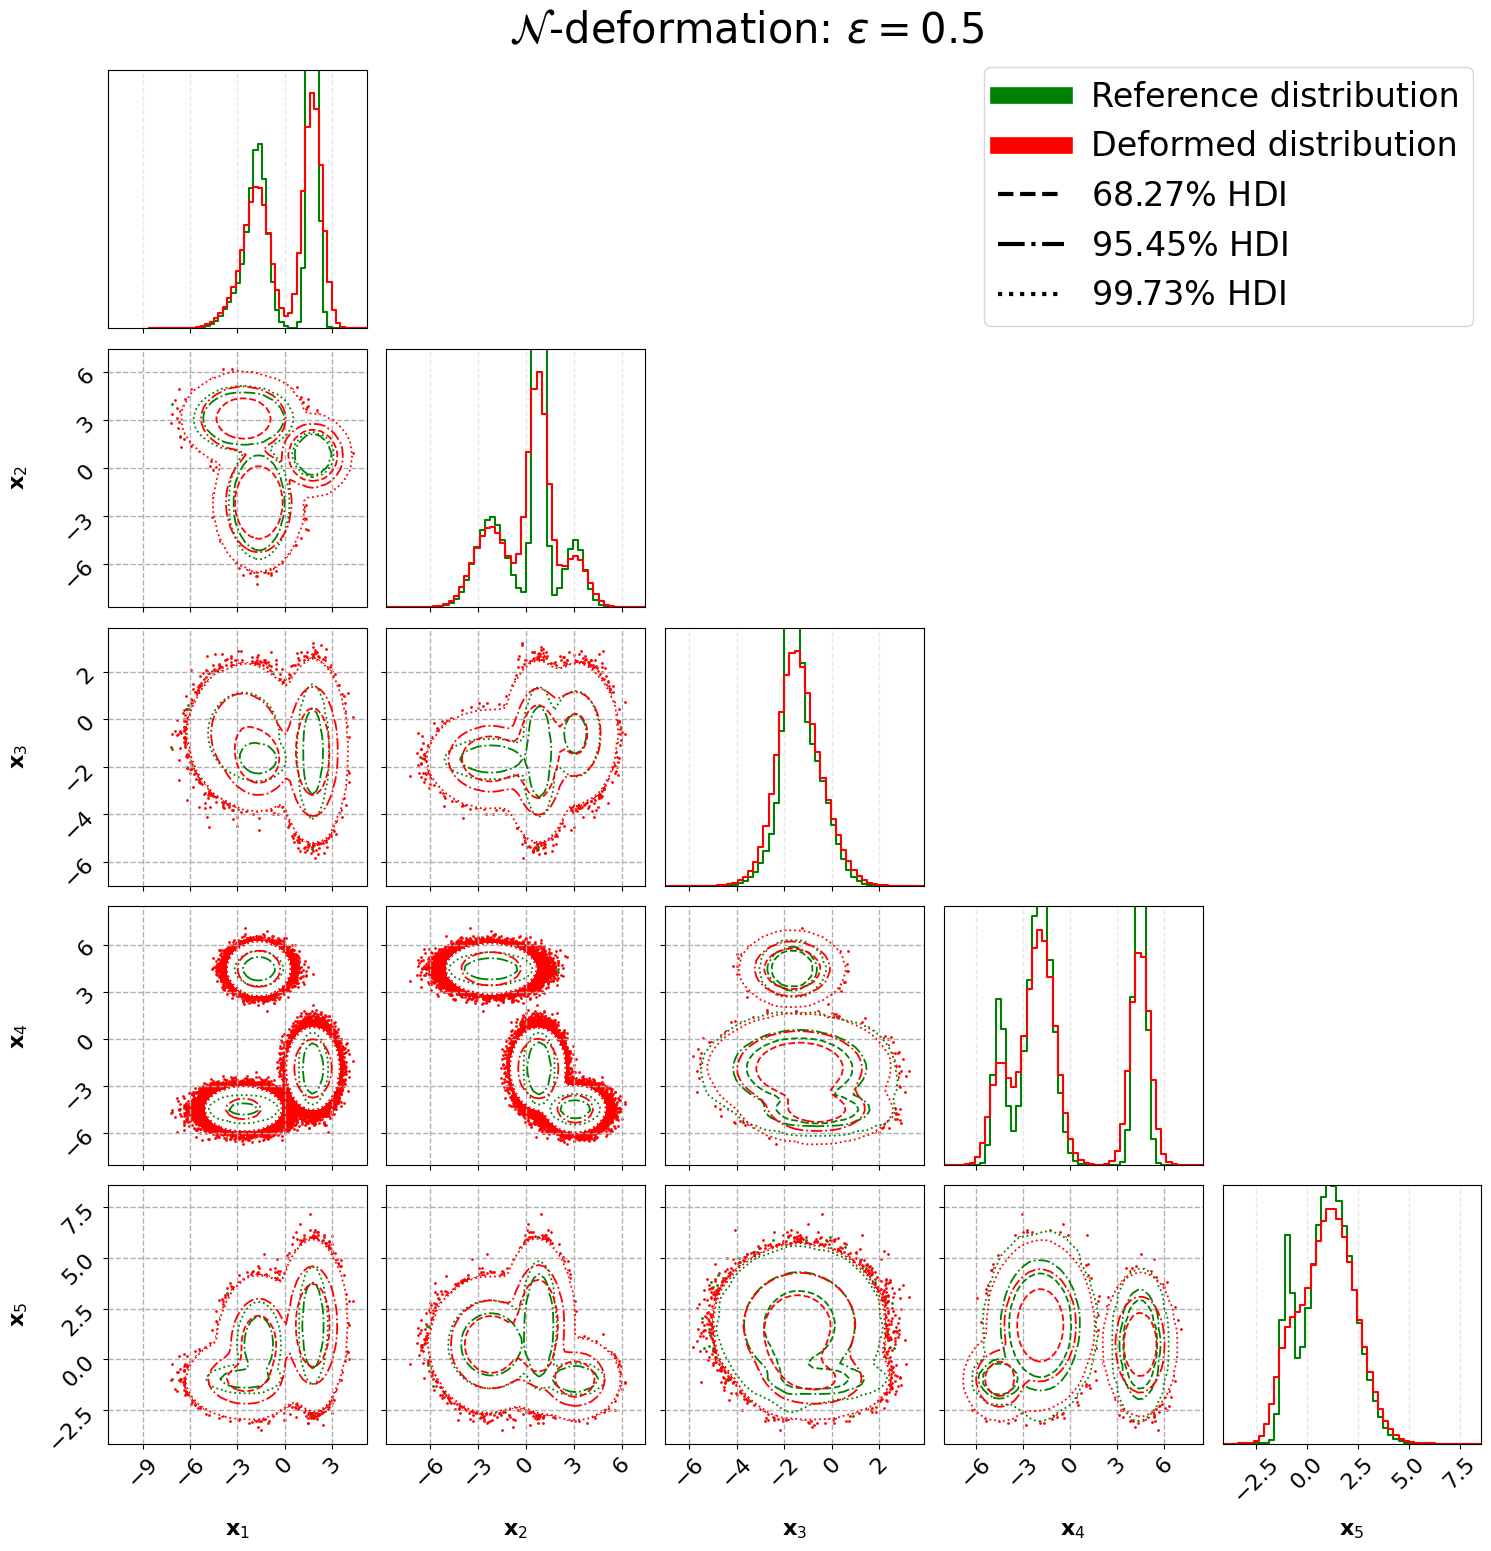

Plot done and saved in 39.41382478404557 s.


In [21]:
plot_corners(dist_1,
             dist_def_6,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_6.png",
             save = True,
             show = True)

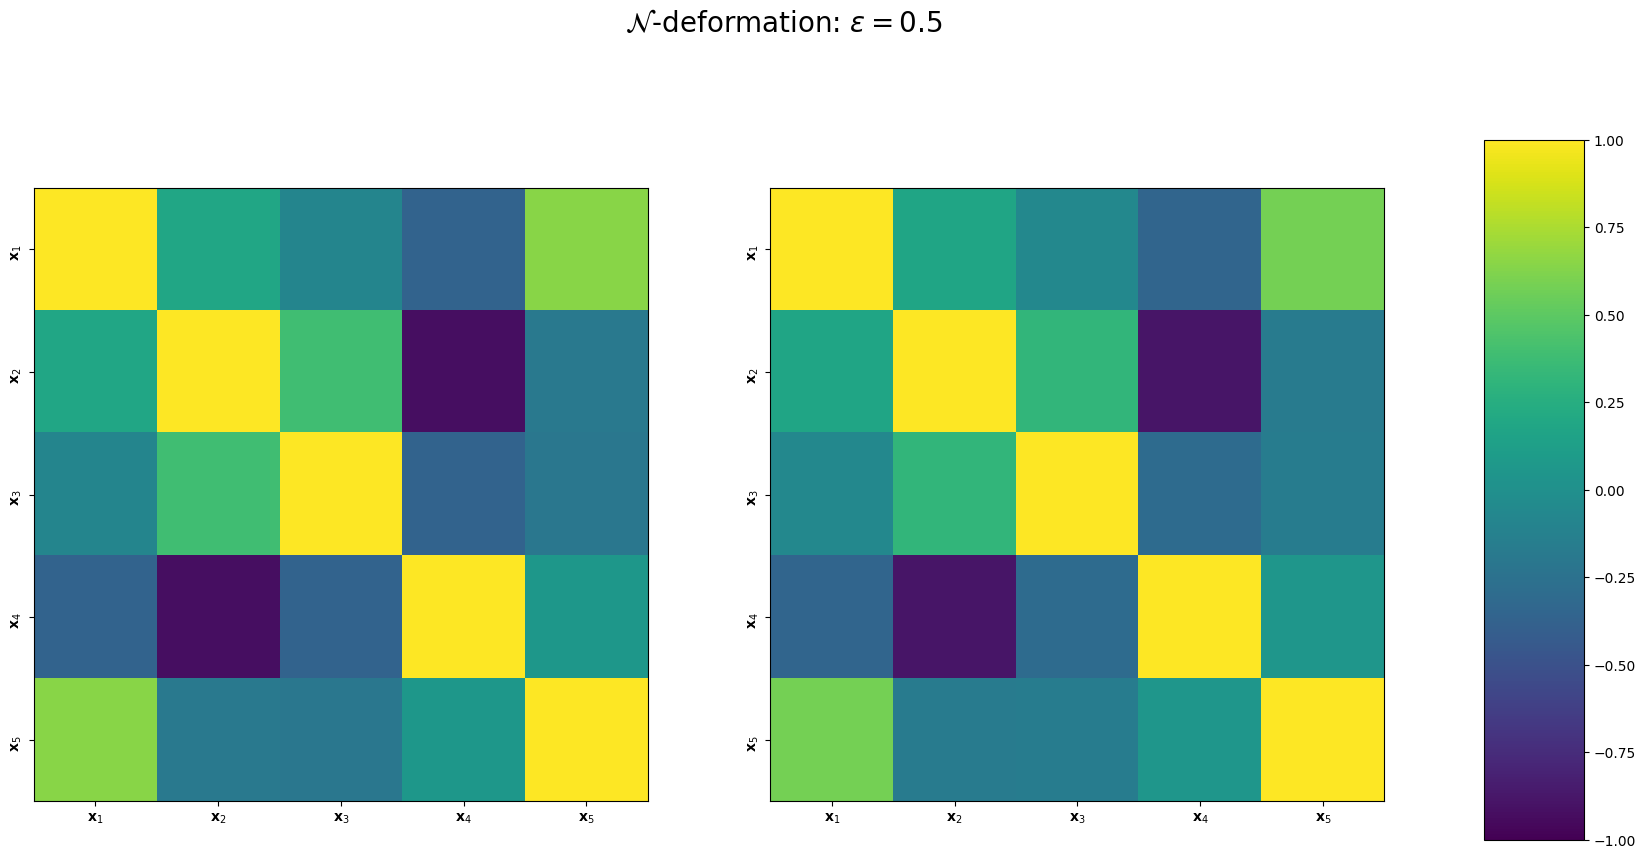

In [22]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_6, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_6.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{N}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

### 7 - $\mathcal{U}$-deformation

In [23]:
eps = 0.5
dist_def_7 = MixtureDistributions.deformed_distribution(dist_1,
                                                        eps = eps,
                                                        deform_type = "random",
                                                        shift_dist = "uniform",
                                                        seed = seed)

Sampling from dist_1...
Sampling from dist_1 done in 0.07450436695944518 s.
Sampling from dist_2...
Sampling from dist_2 done in 0.05894054000964388 s.
Computing HPD intervals...
HPD intervals computed in 4.334460161975585 s.
Computing HPD quotas...
HPD quotas computed in 3.7960180639638565 s.
Plotting corner plot...


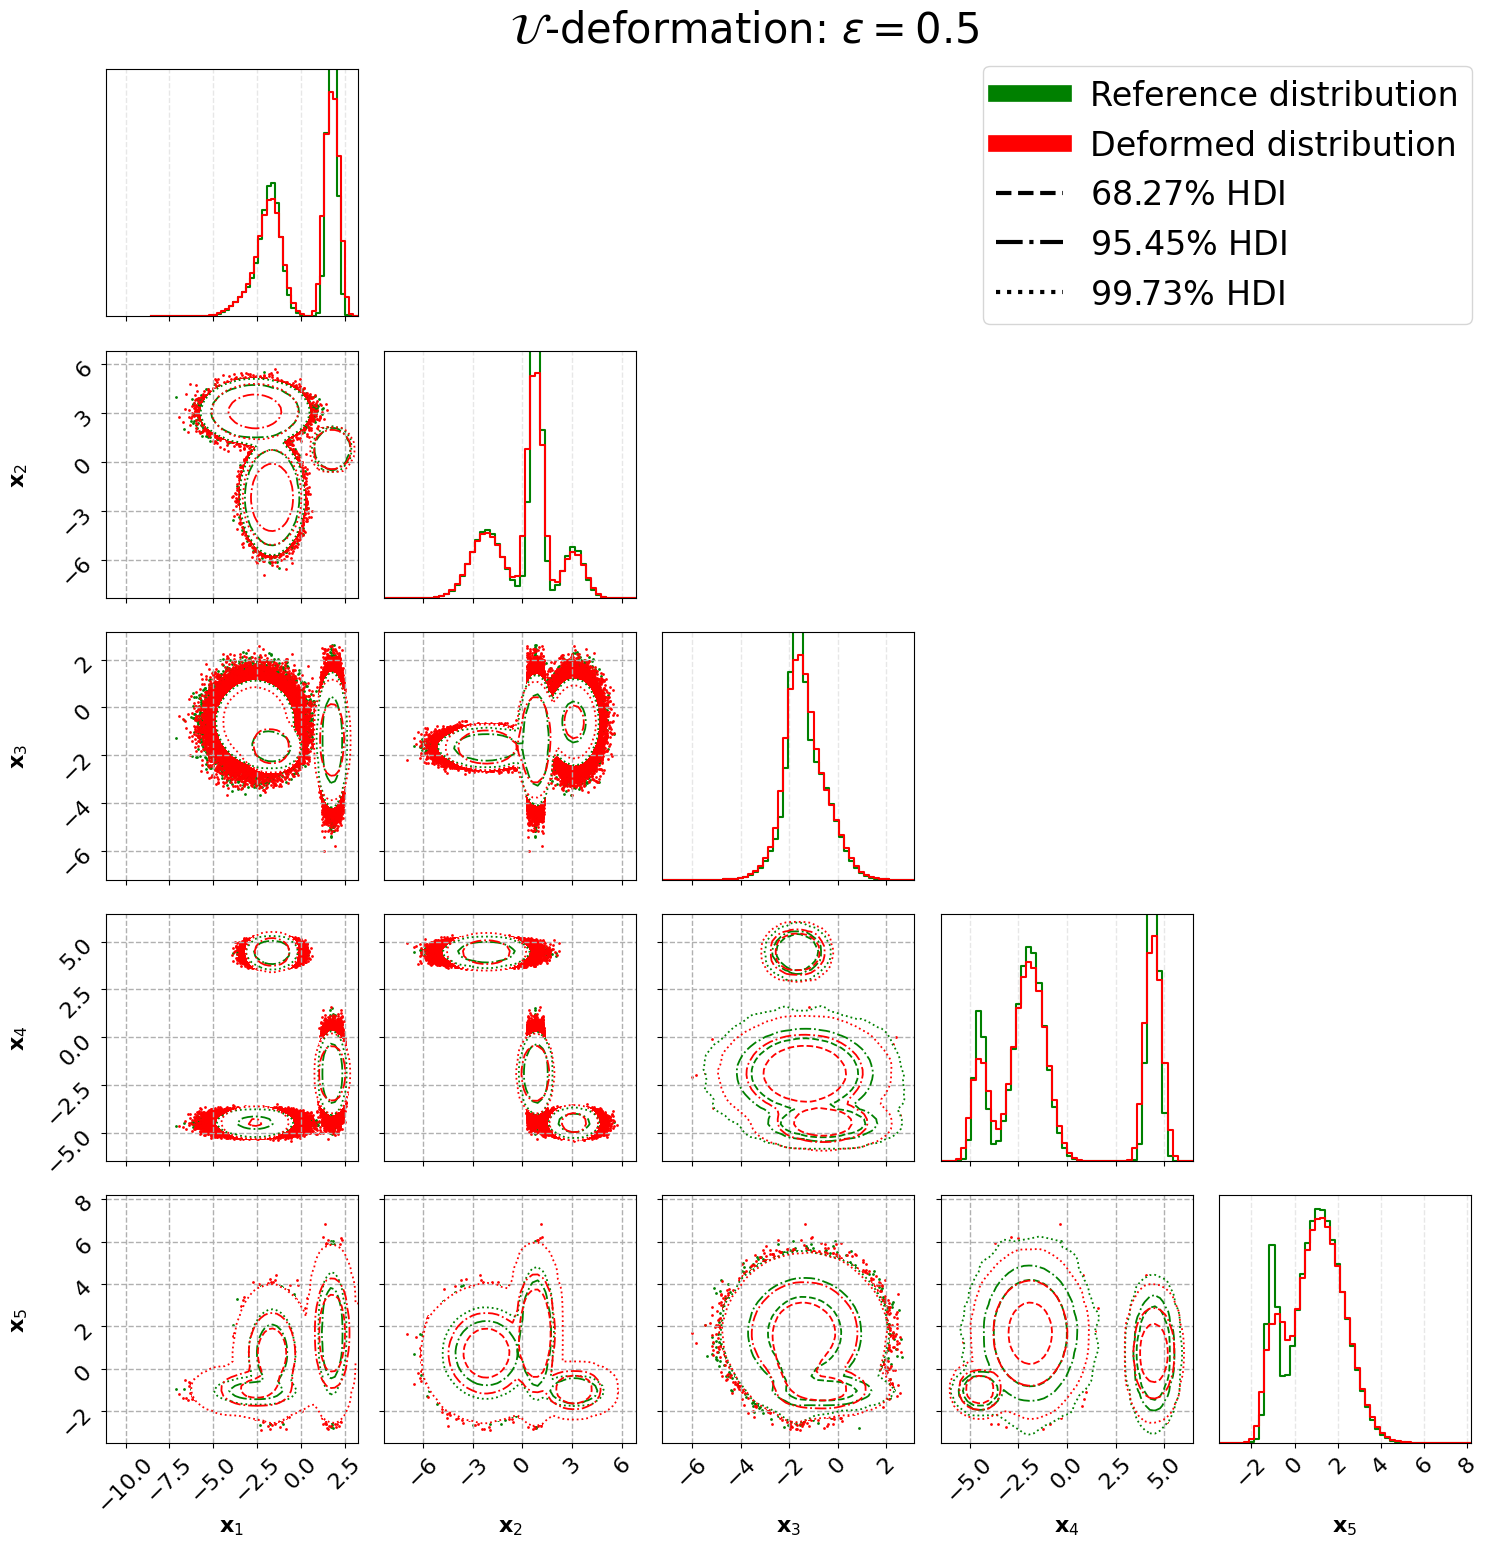

Plot done and saved in 33.92513298097765 s.


In [24]:
plot_corners(dist_1,
             dist_def_7,
             max_points = 1_000_000,
             max_dim = 32,
             n_bins = 50,
             w1 = None,
             w2 = None,
             sigma_contours = [1,2,3],
             show_intervals_1d = False,
             extend_range_percent = 20,
             title1 = None,
             title2 = None,
             color1 = "green",
             color2 = "red",
             plot_title = "$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$",
             title_kwargs = {"fontsize": 30, "y": 1.03},
             legend_labels = [r"Reference distribution",
                              r"Deformed distribution",
                              r'$68.27\%$ HDI',
                              r'$95.45\%$ HDI',
                              r'$99.73\%$ HDI'],
             legend_kwargs = {"fontsize": 24, "loc": (0.66,0.79)},
             figdir = results_dir,
             figname = "corner_plot_def_7.png",
             save = True,
             show = True)

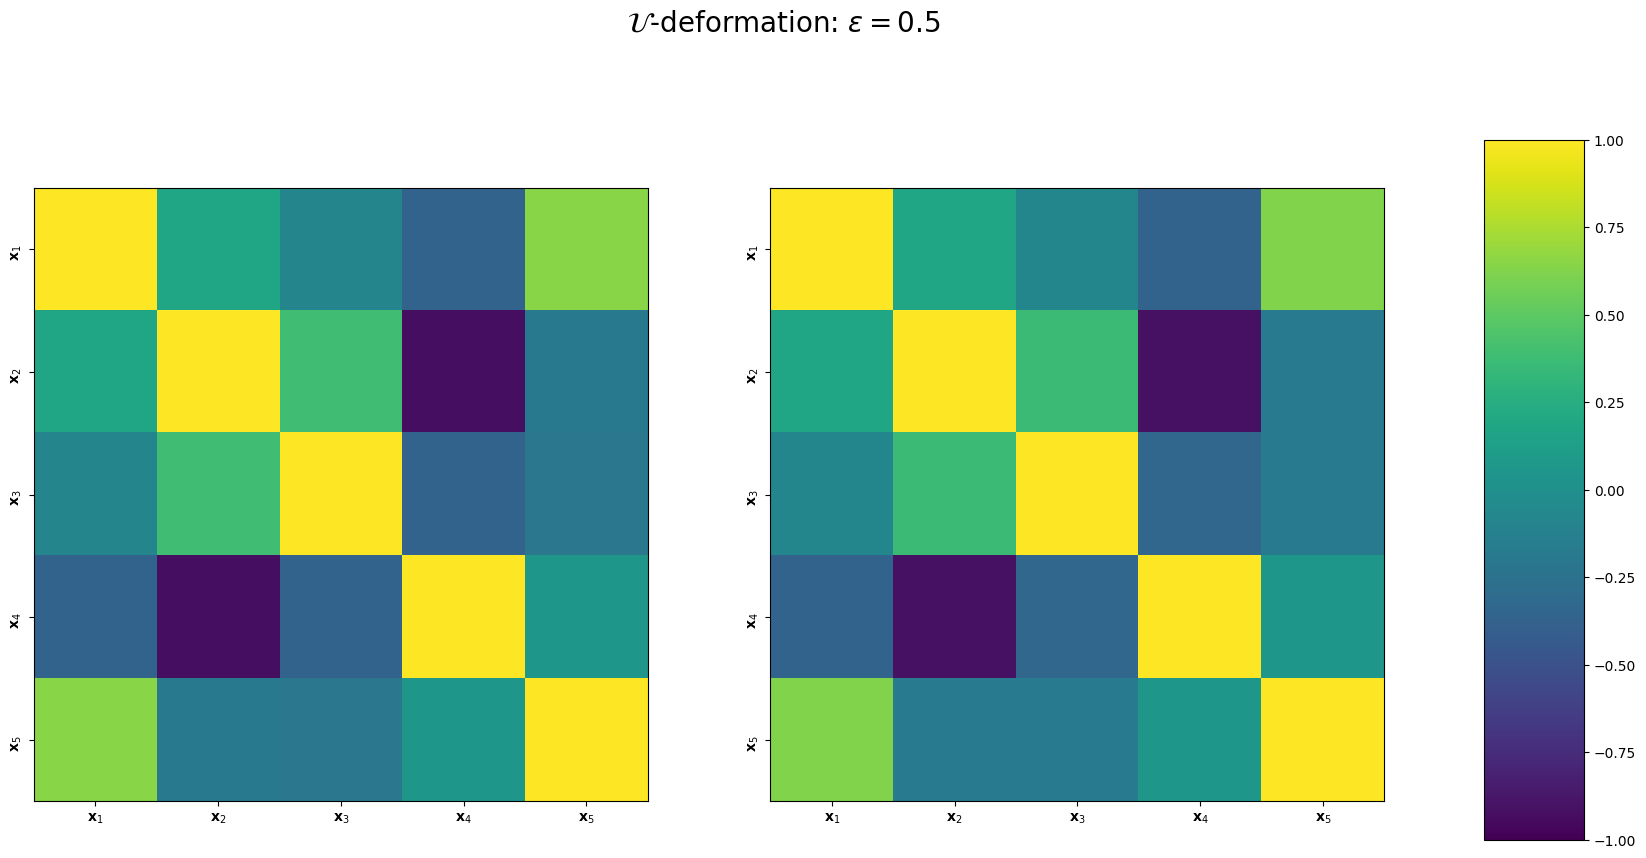

In [25]:
plot_corr_matrix_side_by_side(dist_1 = dist_1, 
                              dist_2 = dist_def_7, 
                              path_to_plots = results_dir, 
                              figure_name = "corre_matrix_plot_def_7.pdf",
                              max_points = 1_000_000,
                              title = r"%s"%("$\mathcal{U}$-deformation: $\epsilon = "+str(eps)+"$"),
                              show_labels = True,
                              show = True,
                              save = True)

# Fixed $n=10000$

## Null hypotheses

### Model definition

In [4]:
batch_size_test = 10_000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...


Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 100000000
batch_size 10000
niter 10000
niter * batch_size 100000000
small_sample False


In [7]:
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100, # to be included in metric kwargs
                           seed_slicing = 0, # to be included in metric kwargs
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100, # to be included in metric kwargs
                               seed_slicing = 0, # to be included in metric kwargs
                               progress_bar = True,
                               verbose = True)
FGDMetric = GMetrics.FGDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               num_batches = 20, # to be included in metric kwargs
                               num_points = 10, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
MMDMetric = GMetrics.MMDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4, # to be included in metric kwargs
                               block_size = 10_000, # to be included in metric kwargs
                               normalise = False) # to be included in metric kwargs
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [8]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

niter  batch_size_test  batch_size_gen  small_sample_threshold dtype_input  \
0  10000            10000           10000                10000000     float64   

   seed  use_tf  mirror_strategy strategy  verbose  ...  ndims_1  nsamples_1  \
0     0    True            False     None     True  ...        5           0   

   is_symb_2  ndims_2  nsamples_2    dtype ndims   nsamples  small_sample  \
0       True        5           0  float64     5  100000000         False   

   ncomp  
0      3  

[1 rows x 21 columns]

In [9]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fgd": {"name": "fgd",
                                       "object_name": "FGDMetric",
                                       "class_name": "GMetrics.FGDMetric",
                                       "kwargs": {"num_batches": 20,
                                                  "num_points": 10,
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000, # optimized for 5D
                                       "latex": "$d_{\mathrm{FGD}}$",
                                       "null_file": null_hypotheses_dir+"FGD.json"},
                               "mmd": {"name": "mmd",
                                       "object_name": "MMDMetric" ,
                                       "class_name": "GMetrics.MMDMetric",
                                       "kwargs": {"degree": 4, 
                                                  "block_size": 10_000, 
                                                  "normalise": False},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 1,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 1",
                                       "test_config": test_config_null,
                                       "max_vectorize": 20, # optimized for 5D
                                       "latex": "$d_{\mathrm{MMD}}$",
                                       "null_file": null_hypotheses_dir+"MMD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 10000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, 
                                                  "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 500,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 2000,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fgd': {'name': 'fgd',
  'object_name': 'FGDMetric',
  'class_name': 'GMetrics.FGDMetric',
  'kwargs': {'num_batches': 20, 'num_points': 10, 'normalise': False},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: 1',
  'test_config': {'niter': 10000,
   'batch_size_test': 10000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 100000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 1000,
  'latex': '$d_{\\mathrm{FGD}}$',
  'null_file': 'results/5D_mixture/5D_10K/null_hypothesis/FGD.json'},
 'mmd': {'name': 'mmd',
  'object_name': 'MMDMetric',
  'class_name': 'GMetrics.MMDMetri

### Evaluate null hypotheses

In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fgd from results/5D_mixture/5D_10K/null_hypothesis/FGD.json
Loading mmd from results/5D_mixture/5D_10K/null_hypothesis/MMD.json
Loading ks from results/5D_mixture/5D_10K/null_hypothesis/KS.json
Loading sks from results/5D_mixture/5D_10K/null_hypothesis/SKS.json
Loading swd from results/5D_mixture/5D_10K/null_hypothesis/SWD.json


In [11]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fgd: [[0.68, [6800, 3199], 0.0007639936940610248], [0.95, [9500, 500], 0.012146227899100895], [0.99, [9900, 100], 0.022982025960021482]]
Computing time for metric fgd: 368.08616294304375
ThresholdS for metric mmd: [[0.68, [6800, 3199], 0.04561235565654442], [0.95, [9500, 500], 0.59989835678914], [0.99, [9900, 100], 1.1295276084438228]]
Computing time for metric mmd: 215.4278768019867
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9178255979944627], [0.95, [9500, 500], 1.1596557853802705], [0.99, [9900, 100], 1.3152195924997379]]
Computing time for metric ks: 37.682656027027406
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9143600075212037], [0.95, [9500, 500], 1.16799941258751], [0.99, [9900, 100], 1.3416648433321408]]
Computing time for metric sks: 352.4246458549751
ThresholdS for metric swd: [[0.68, [6800, 3199], 1.020703829007035], [0.95, [9500, 500], 1.5629798345828714], [0.99, [9900, 100], 1.9324611216642107]]
Computing time for metric swd: 261.302843

name object_name          class_name  \
0  fgd   FGDMetric  GMetrics.FGDMetric   
1  mmd   MMDMetric  GMetrics.MMDMetric   
2   ks      KSTest     GMetrics.KSTest   
3  sks     SKSTest    GMetrics.SKSTest   
4  swd   SWDMetric  GMetrics.SWDMetric   
5   lr    LRMetric   GMetrics.LRMetric   

                                              kwargs           result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...          metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...          metric_list   
2                                                 {}      statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}         metric_means   
4                {'nslices': 100, 'seed_slicing': 0}         metric_means   
5                                {'null_test': True}  lik_ratio_norm_list   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7faaf00140e0>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7faaf0014180>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7faaf0014220>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7faaf00142c0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7faaf0014360>  lambda ns, ndims: np.sqrt(ns/ndims)   
5  <function <lambda> at 0x7faaf0014400>        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...             20   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                latex                                          null_file  \
0  $d_{\mathrm{FGD}}$  results/5D_mixture/5D_10K/null_hypothesis/FGD....   
1  $d_{\mathrm{MMD}}$  results/5D_mixture/5D_10K/null_hypothesis/MMD....   
2      $\overline{D}$  results/5D_mixture/5D_10K/null_hypothesis/KS.json   
3     $\widetilde{D}$  results/5D_mixture/5D_10K/null_hypothesis/SKS....   
4     $\widetilde{W}$  results/5D_mixture/5D_10K/null_hypothesis/SWD....   
5           $t_{\mu}$  results/5D_mixture/5D_10K/null_hypothesis/LR.json   

                                          thresholds  
0  [[0.68, [6800, 3199], 0.0007639936940610248], ...  
1  [[0.68, [6800, 3199], 0.04561235565654442], [0...  
2  [[0.68, [6800, 3199], 0.9178255979944627], [0....  
3  [[0.68, [6800, 3199], 0.9143600075212037], [0....  
4  [[0.68, [6800, 3199], 1.020703829007035], [0.9...  
5                                                 []

### Plots of null-distributions

mu = 0.22146936259742275 +/- 0.0023254476488259583
sigma = 0.4822289548363887 +/- 0.010372005807887583
68%CL = 0.07639936940610248, 95%CL = 1.2146227899100894, 99%CL = 2.2982025960021484
mu = 0.22146936259742275 +/- 0.0023254476488259583
sigma = 0.4822289548363887 +/- 0.010372005807887583


/tmp/ipykernel_1151819/3311202556.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1151819/3311202556.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1151819/3311202556.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


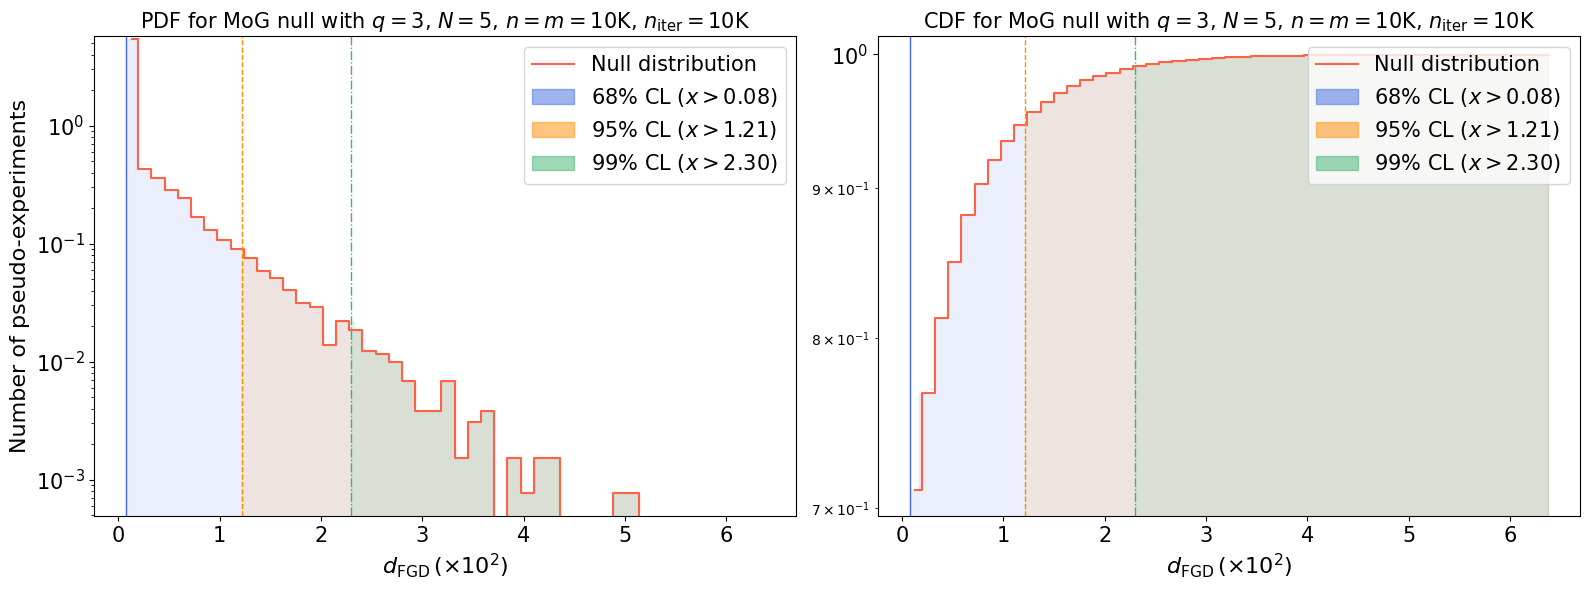

Time elapsed: 1.7030662599718198 seconds.
mu = 0.002307712368423142 +/- 0.0009197417555745023
sigma = 0.3032724444413805 +/- 0.004501567385452458
68%CL = 0.04561235565654442, 95%CL = 0.59989835678914, 99%CL = 1.1295276084438228
mu = 0.002307712368423142 +/- 0.0009197417555745023
sigma = 0.3032724444413805 +/- 0.004501567385452458


/tmp/ipykernel_1151819/3311202556.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1151819/3311202556.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1151819/3311202556.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


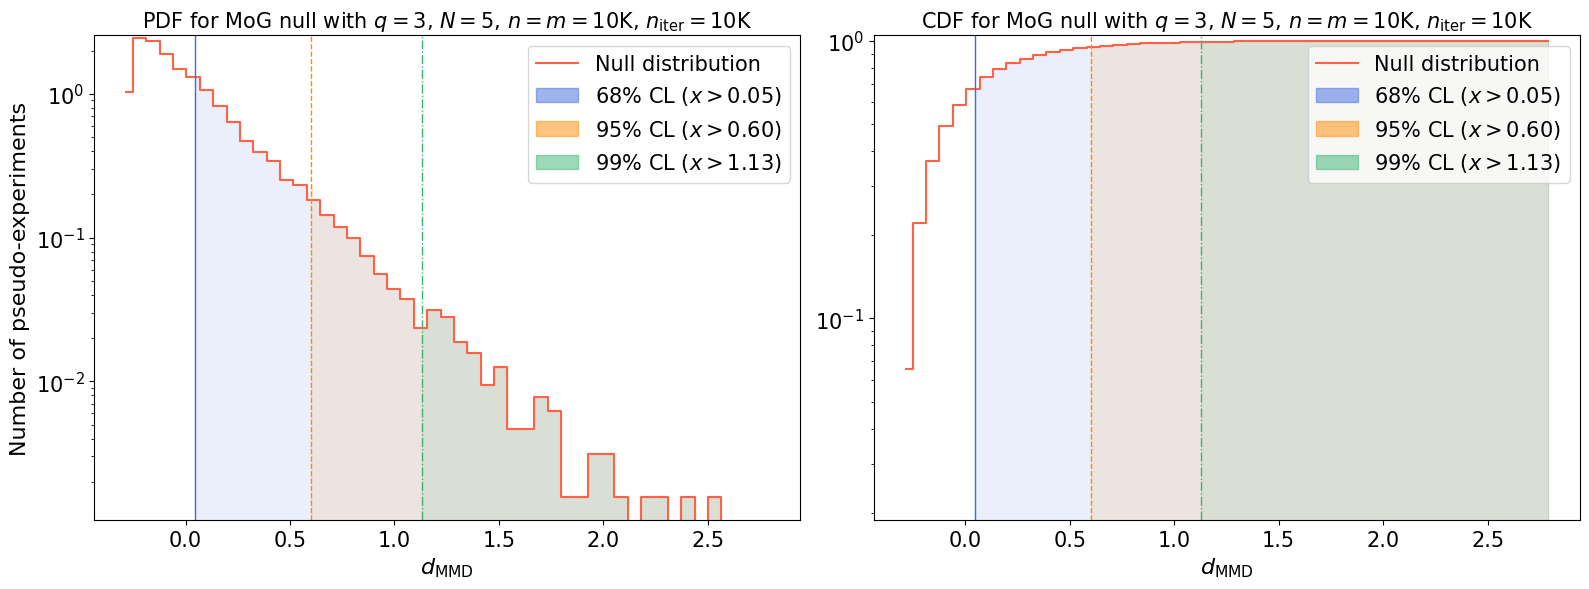

Time elapsed: 0.8422169870464131 seconds.
mu = 0.8671104165773986 +/- 0.0002443262092921647
sigma = 0.15630937569197975 +/- 0.0013593539023954925
68%CL = 0.9178255979944627, 95%CL = 1.1596557853802705, 99%CL = 1.3152195924997379
mu = 0.8671104165773986 +/- 0.0002443262092921647
sigma = 0.15630937569197975 +/- 0.0013593539023954925


/tmp/ipykernel_1151819/3311202556.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1151819/3311202556.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1151819/3311202556.py:116: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1151819/3311202556.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


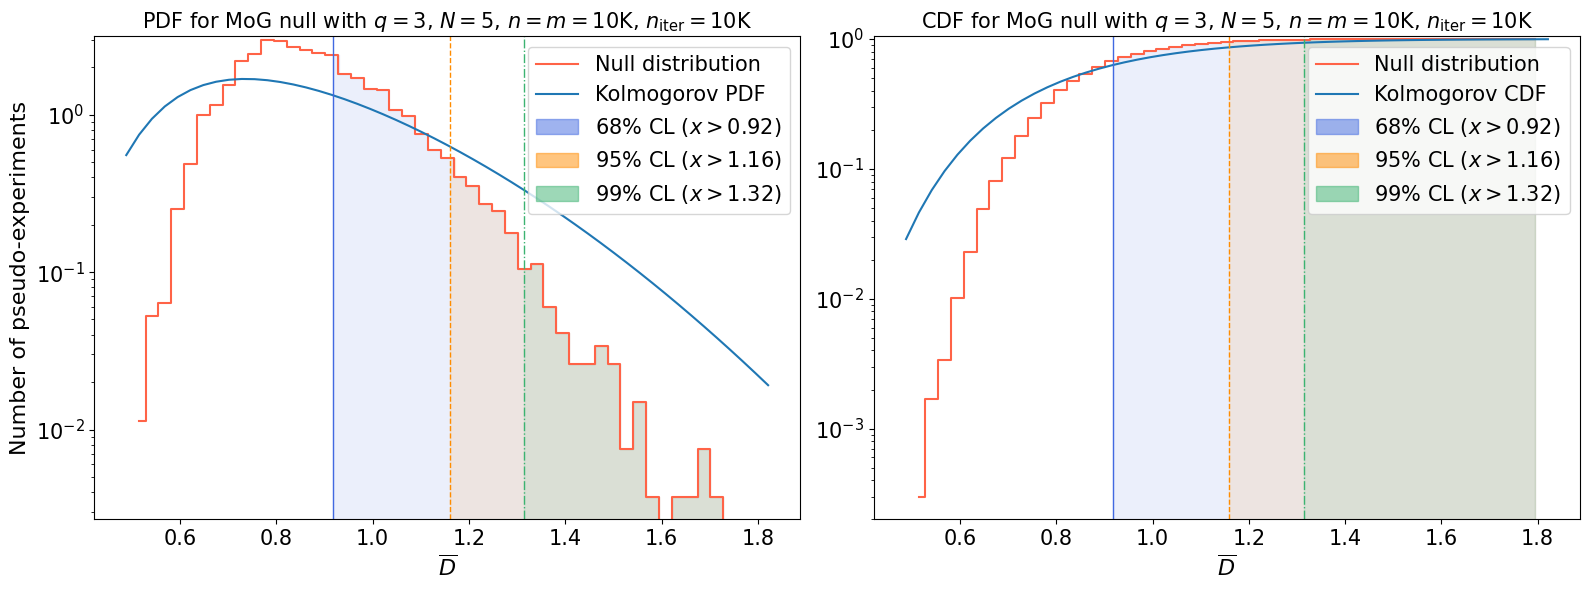

Time elapsed: 1.2822485680226237 seconds.
mu = 0.8650661467822341 +/- 0.0002504173332028649
sigma = 0.1582458003243261 +/- 0.0015235263641073138
68%CL = 0.9143600075212037, 95%CL = 1.16799941258751, 99%CL = 1.3416648433321408
mu = 0.8650661467822341 +/- 0.0002504173332028649
sigma = 0.1582458003243261 +/- 0.0015235263641073138


/tmp/ipykernel_1151819/3311202556.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1151819/3311202556.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1151819/3311202556.py:116: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1151819/3311202556.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


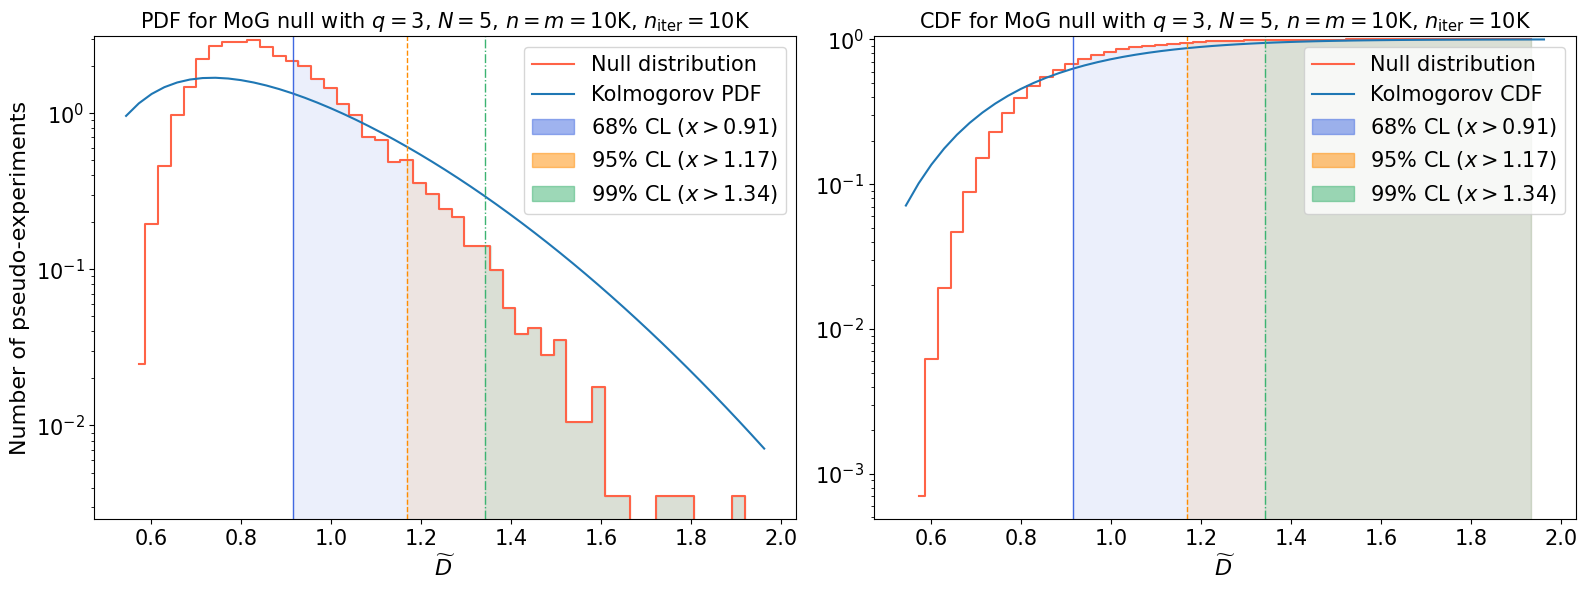

Time elapsed: 1.301955720060505 seconds.
mu = 0.9259113708414085 +/- 0.001064657281972061
sigma = 0.32629086440966454 +/- 0.003040288053877718
68%CL = 1.020703829007035, 95%CL = 1.5629798345828714, 99%CL = 1.9324611216642107
mu = 0.9259113708414085 +/- 0.001064657281972061
sigma = 0.32629086440966454 +/- 0.003040288053877718


/tmp/ipykernel_1151819/3311202556.py:81: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_1151819/3311202556.py:83: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_1151819/3311202556.py:116: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_1151819/3311202556.py:122: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


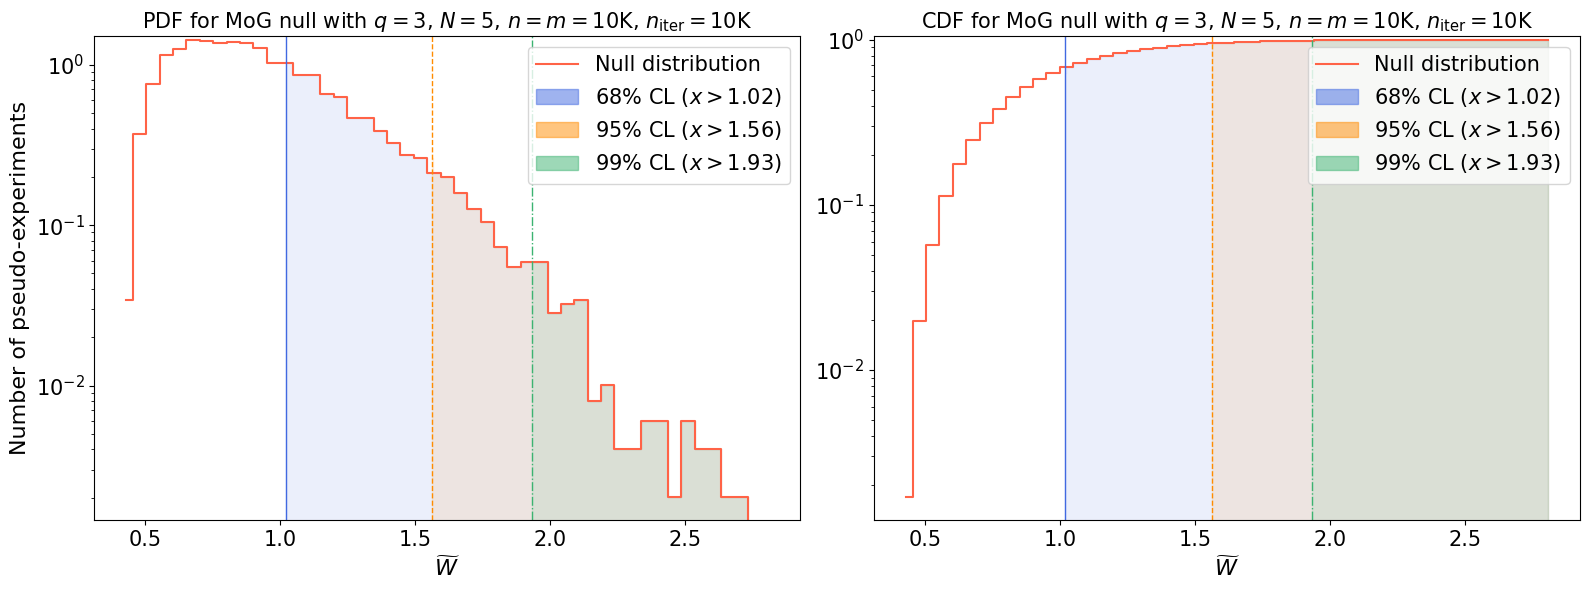

Time elapsed: 0.8684935100609437 seconds.


name object_name          class_name  \
0  fgd   FGDMetric  GMetrics.FGDMetric   
1  mmd   MMDMetric  GMetrics.MMDMetric   
2   ks      KSTest     GMetrics.KSTest   
3  sks     SKSTest    GMetrics.SKSTest   
4  swd   SWDMetric  GMetrics.SWDMetric   
5   lr    LRMetric   GMetrics.LRMetric   

                                              kwargs           result_key  \
0  {'num_batches': 20, 'num_points': 10, 'normali...          metric_list   
1  {'degree': 4, 'block_size': 10000, 'normalise'...          metric_list   
2                                                 {}      statistic_means   
3                {'nslices': 100, 'seed_slicing': 0}         metric_means   
4                {'nslices': 100, 'seed_slicing': 0}         metric_means   
5                                {'null_test': True}  lik_ratio_norm_list   

                              scale_func                    scale_func_string  \
0  <function <lambda> at 0x7ff426b540e0>                  lambda ns, ndims: 1   
1  <function <lambda> at 0x7ff426b54180>                  lambda ns, ndims: 1   
2  <function <lambda> at 0x7ff426b54220>            lambda ns, _: np.sqrt(ns)   
3  <function <lambda> at 0x7ff426b542c0>            lambda ns, _: np.sqrt(ns)   
4  <function <lambda> at 0x7ff426b54360>  lambda ns, ndims: np.sqrt(ns/ndims)   
5  <function <lambda> at 0x7ff426b54400>        lambda ns, ndims: np.sqrt(ns)   

                                         test_config  max_vectorize  \
0  {'niter': 10000, 'batch_size_test': 10000, 'ba...           1000   
1  {'niter': 10000, 'batch_size_test': 10000, 'ba...             20   
2  {'niter': 10000, 'batch_size_test': 10000, 'ba...          10000   
3  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
4  {'niter': 10000, 'batch_size_test': 10000, 'ba...            500   
5  {'niter': 10000, 'batch_size_test': 10000, 'ba...           2000   

                latex                                          null_file  \
0  $d_{\mathrm{FGD}}$  results/5D_mixture/5D_10K/null_hypothesis/FGD....   
1  $d_{\mathrm{MMD}}$  results/5D_mixture/5D_10K/null_hypothesis/MMD....   
2      $\overline{D}$  results/5D_mixture/5D_10K/null_hypothesis/KS.json   
3     $\widetilde{D}$  results/5D_mixture/5D_10K/null_hypothesis/SKS....   
4     $\widetilde{W}$  results/5D_mixture/5D_10K/null_hypothesis/SWD....   
5           $t_{\mu}$  results/5D_mixture/5D_10K/null_hypothesis/LR.json   

                                          thresholds  \
0  [[0.68, [6800, 3199], 0.0007639936940610248], ...   
1  [[0.68, [6800, 3199], 0.04561235565654442], [0...   
2  [[0.68, [6800, 3199], 0.9178255979944627], [0....   
3  [[0.68, [6800, 3199], 0.9143600075212037], [0....   
4  [[0.68, [6800, 3199], 1.020703829007035], [0.9...   
5                                                 []   

                                         null_figure  
0  results/5D_mixture/5D_10K/null_hypothesis/FGD.pdf  
1  results/5D_mixture/5D_10K/null_hypothesis/MMD.pdf  
2   results/5D_mixture/5D_10K/null_hypothesis/KS.pdf  
3  results/5D_mixture/5D_10K/null_hypothesis/SKS.pdf  
4  results/5D_mixture/5D_10K/null_hypothesis/SWD.pdf  
5                                                NaN

In [12]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    if "FGD" in latex:
        latex = r"$d_{\mathrm{FGD}}\,(\times 10^{2})$"
        dist_null = dist_null * 100
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    sigma_68, sigma_95, sigma_99 = [np.sort(dist_null)[int(len(dist_null)*cl)] for cl in [0.68, 0.95, 0.99]]
    print(f"mu = {mu} +/- {deltamu}")
    print(f"sigma = {sigma} +/- {deltasigma}")
    print(f"68%CL = {sigma_68}, 95%CL = {sigma_95}, 99%CL = {sigma_99}")
    
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        if "FGD" in latex:
            threshold_value = threshold_value * 100
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

GMetrics.utils.save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [12]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [13]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [14]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down", "random_normal", "random_uniform"]
bounds = ["upper", "central", "lower"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        eps_max = 1.
        for bound in bounds:
            try:
                result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation and v["bound"] == bound}.items() if v["exclusion_list"] != []}
            except:
                result = {}
            if result == {}:
                print(f"Computing {bound} bounds for {metric_config['name']} with {deformation} deformation.")
                result = compute_exclusion_bisection(dist_1,
                                                     metric_config = metric_config,
                                                     test_kwargs = test_kwargs,
                                                     model_dir = model_dir,
                                                     deformation = deformation,
                                                     seed_dist = 0,
                                                     x_tol = 0.01,
                                                     fn_tol = 0.05,
                                                     bound = bound,
                                                     eps_min = 0.,
                                                     eps_max = eps_max,
                                                     max_iterations = 50,
                                                     save = True,
                                                     filename = "exclusion_limits.json",
                                                     verbose = True)
                eps_max = list(result.values())[0]["exclusion_list"][-1][3]
            else:
                print(f"{bound.capitalize()} bounds for {metric_config['name']} with {deformation} deformation already loaded.")
            global_results.update(result)
print(global_results.keys())

Upper bounds for fgd with mean deformation already loaded.
Central bounds for fgd with mean deformation already loaded.
Lower bounds for fgd with mean deformation already loaded.
Upper bounds for fgd with cov_diag deformation already loaded.
Central bounds for fgd with cov_diag deformation already loaded.
Lower bounds for fgd with cov_diag deformation already loaded.
Upper bounds for fgd with cov_off_diag deformation already loaded.
Central bounds for fgd with cov_off_diag deformation already loaded.
Lower bounds for fgd with cov_off_diag deformation already loaded.
Upper bounds for fgd with power_abs_up deformation already loaded.
Central bounds for fgd with power_abs_up deformation already loaded.
Lower bounds for fgd with power_abs_up deformation already loaded.
Upper bounds for fgd with power_abs_down deformation already loaded.
Central bounds for fgd with power_abs_down deformation already loaded.
Lower bounds for fgd with power_abs_down deformation already loaded.
Upper bounds fo

### Likelihood-ratio test

In [15]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter_null": niter,
               "niter_alt": 100,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [16]:
deformations = ["mean", "cov_diag", "cov_off_diag", "power_abs_up", "power_abs_down"]
eps_max_def = []
bounds = ["upper", "central", "lower"]

for deformation in deformations:
    eps_max = 0.01
    for bound in bounds:
        try:
            result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation and v["bound"] == bound}
        except:
            result = {}
        if result == {}:
            print(f"Computing {bound} bounds for lr with {deformation} deformation.")
            result = compute_exclusion_LR_bisection(dist_1,
                                                    metric_config = metrics_config[unique_key]["lr"],
                                                    test_kwargs = test_kwargs,
                                                    model_dir = model_dir,
                                                    cl_list = [0.95, 0.99],
                                                    deformation = deformation,
                                                    seed_dist = 0,
                                                    x_tol = 0.01,
                                                    fn_tol = 0.05,
                                                    bound = bound,
                                                    eps_min = 0.,
                                                    eps_max = eps_max,
                                                    max_iterations = 50,
                                                    save = True,
                                                    filename = "exclusion_limits.json",
                                                    verbose = True)
            eps_max = list(result.values())[0]["exclusion_list"][-1][3]
        else:
            print(f"{bound.capitalize()} bounds for lr with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Upper bounds for lr with mean deformation already loaded.
Central bounds for lr with mean deformation already loaded.
Lower bounds for lr with mean deformation already loaded.
Upper bounds for lr with cov_diag deformation already loaded.
Central bounds for lr with cov_diag deformation already loaded.
Lower bounds for lr with cov_diag deformation already loaded.
Upper bounds for lr with cov_off_diag deformation already loaded.
Central bounds for lr with cov_off_diag deformation already loaded.
Lower bounds for lr with cov_off_diag deformation already loaded.
Upper bounds for lr with power_abs_up deformation already loaded.
Central bounds for lr with power_abs_up deformation already loaded.
Lower bounds for lr with power_abs_up deformation already loaded.
Upper bounds for lr with power_abs_down deformation already loaded.
Central bounds for lr with power_abs_down deformation already loaded.
Lower bounds for lr with power_abs_down deformation already loaded.
dict_keys(['fgd_mean_upper_202

### Show and save results

In [17]:
# Function to format bounds
def format_bounds(bounds):
    lower, central, upper = bounds
    return f"${central}_{{-{central-lower:.2g}}}^{{+{upper-central:.2g}}}$"

def format_times(times):
    return sum(times)

global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    pippo = global_result
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    bound = global_result["bound"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][1][3], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][2][3], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, bound, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "Bound", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
results_df = results_df.groupby(["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$"]).agg({
    "$\\epsilon_{95\\%\\mathrm{CL}}$": lambda x: sorted(x.tolist()),
    "$\\epsilon_{99\\%\\mathrm{CL}}$": lambda x: sorted(x.tolist()),
    "t (s)": lambda x: x.tolist()
}).reset_index()
results_df["95%CL"] = results_df["$\\epsilon_{95\\%\\mathrm{CL}}$"]
results_df["99%CL"] = results_df["$\\epsilon_{99\\%\\mathrm{CL}}$"]
results_df["time"] = results_df["t (s)"]
results_df["$\\epsilon_{95\\%\\mathrm{CL}}$"] = results_df["$\\epsilon_{95\\%\\mathrm{CL}}$"].apply(format_bounds)
results_df["$\\epsilon_{99\\%\\mathrm{CL}}$"] = results_df["$\\epsilon_{99\\%\\mathrm{CL}}$"].apply(format_bounds)
results_df["t (s)"] = results_df["t (s)"].apply(format_times)
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: fgd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: mmd
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
M

In [18]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_cov_diag = results_df[results_df["Deformation"] == "cov_diag"]
results_df_cov_off_diag = results_df[results_df["Deformation"] == "cov_off_diag"]
results_df_power_abs_up = results_df[results_df["Deformation"] == "power_abs_up"]
results_df_power_abs_down = results_df[results_df["Deformation"] == "power_abs_down"]
results_df_random_normal = results_df[results_df["Deformation"] == "random_normal"]
results_df_random_uniform = results_df[results_df["Deformation"] == "random_uniform"]

In [19]:
results_df_mean["sort_key"] = results_df_mean["95%CL"].apply(lambda x: x[1])
sorted_df_mean = results_df_mean.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_mean)

/tmp/ipykernel_186945/2349835371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_mean["sort_key"] = results_df_mean["95%CL"].apply(lambda x: x[1])


Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
16        lr        mean    5  10000                10000   
9         ks        mean    5  10000                10000   
28       sks        mean    5  10000                10000   
21       mmd        mean    5  10000                10000   
35       swd        mean    5  10000                10000   
2        fgd        mean    5  10000                10000   

   $\epsilon^{\mu}_{95\%\mathrm{CL}}$ $\epsilon^{\mu}_{99\%\mathrm{CL}}$  \
16    $0.00078_{-0.00047}^{+0.00047}$     $0.0011_{-0.00047}^{+0.00047}$   
9       $0.00496_{-0.0017}^{+0.0017}$      $0.00664_{-0.0017}^{+0.0015}$   
28        $0.05494_{-0.019}^{+0.019}$        $0.07242_{-0.018}^{+0.018}$   
21        $0.06434_{-0.025}^{+0.035}$        $0.08544_{-0.025}^{+0.033}$   
35        $0.09192_{-0.035}^{+0.035}$        $0.12363_{-0.032}^{+0.035}$   
2          $0.10354_{-0.044}^{+0.06}$        $0.14117_{-0.042}^{+0.056}$   

    $t^{\mu}$ (s)                        95%CL                        99%CL  \
16           2809  [0.00031, 0.00078, 0.00125]   [0.00063, 0.0011, 0.00157]   
9            1538  [0.00326, 0.00496, 0.00662]  [0.00499, 0.00664, 0.00817]   
28           1747   [0.0355, 0.05494, 0.07349]  [0.05439, 0.07242, 0.09045]   
21           1344  [0.03888, 0.06434, 0.09912]  [0.06089, 0.08544, 0.11892]   
35           1352  [0.05723, 0.09192, 0.12646]   [0.0912, 0.12363, 0.15845]   
2            1276  [0.05983, 0.10354, 0.16357]  [0.09891, 0.14117, 0.19706]   

                time  
16  [1116, 819, 874]  
9    [721, 394, 423]  
28   [726, 503, 518]  
21   [532, 406, 406]  
35   [549, 390, 413]  
2    [503, 400, 373]

Statistic $\epsilon^{\mu}_{95\%\mathrm{CL}}$  \
16        lr    $0.00078_{-0.00047}^{+0.00047}$   
9         ks      $0.00496_{-0.0017}^{+0.0017}$   
28       sks        $0.05494_{-0.019}^{+0.019}$   
21       mmd        $0.06434_{-0.025}^{+0.035}$   
35       swd        $0.09192_{-0.035}^{+0.035}$   
2        fgd         $0.10354_{-0.044}^{+0.06}$   

   $\epsilon^{\mu}_{99\%\mathrm{CL}}$  $t^{\mu}$ (s)  
16     $0.0011_{-0.00047}^{+0.00047}$           2809  
9       $0.00664_{-0.0017}^{+0.0015}$           1538  
28        $0.07242_{-0.018}^{+0.018}$           1747  
21        $0.08544_{-0.025}^{+0.033}$           1344  
35        $0.12363_{-0.032}^{+0.035}$           1352  
2         $0.14117_{-0.042}^{+0.056}$           1276

In [20]:
results_df_cov_diag["sort_key"] = results_df_cov_diag["95%CL"].apply(lambda x: x[1])
sorted_df_cov_diag = results_df_cov_diag.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_cov_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ii}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{ii}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{ii}}$ (s)"}, inplace=True)
display(sorted_df_cov_diag)
sorted_df_cov_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_cov_diag)

/tmp/ipykernel_186945/2882134307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_cov_diag["sort_key"] = results_df_cov_diag["95%CL"].apply(lambda x: x[1])


Statistic Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
14        lr    cov_diag    5  10000                10000   
7         ks    cov_diag    5  10000                10000   
19       mmd    cov_diag    5  10000                10000   
26       sks    cov_diag    5  10000                10000   
33       swd    cov_diag    5  10000                10000   
0        fgd    cov_diag    5  10000                10000   

   $\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
14            $0.00027_{-0.00016}^{+0.00016}$   
7             $0.00274_{-0.00069}^{+0.00063}$   
19              $0.01392_{-0.0046}^{+0.0054}$   
26              $0.01644_{-0.0045}^{+0.0038}$   
33              $0.03015_{-0.0099}^{+0.0085}$   
0                  $0.0327_{-0.01}^{+0.0089}$   

   $\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ii}}$ (s)  \
14            $0.00037_{-0.00016}^{+0.00017}$                   2999   
7             $0.00353_{-0.00064}^{+0.00059}$                   1625   
19                $0.0188_{-0.0044}^{+0.005}$                   1496   
26              $0.02223_{-0.0038}^{+0.0033}$                   1886   
33              $0.04164_{-0.0086}^{+0.0081}$                   1531   
0                $0.0444_{-0.0077}^{+0.0077}$                   1269   

                          95%CL                        99%CL              time  
14  [0.00011, 0.00027, 0.00043]  [0.00021, 0.00037, 0.00054]  [1251, 843, 905]  
7   [0.00205, 0.00274, 0.00337]  [0.00289, 0.00353, 0.00412]   [817, 394, 414]  
19  [0.00929, 0.01392, 0.01935]   [0.01445, 0.0188, 0.02384]   [695, 386, 415]  
26   [0.01194, 0.01644, 0.0202]  [0.01845, 0.02223, 0.02558]   [855, 527, 504]  
33   [0.02025, 0.03015, 0.0387]  [0.03303, 0.04164, 0.04973]   [627, 551, 353]  
0    [0.02264, 0.0327, 0.04163]   [0.03675, 0.0444, 0.05215]   [563, 351, 355]

Statistic $\epsilon^{\Sigma_{ii}}_{95\%\mathrm{CL}}$  \
14        lr            $0.00027_{-0.00016}^{+0.00016}$   
7         ks            $0.00274_{-0.00069}^{+0.00063}$   
19       mmd              $0.01392_{-0.0046}^{+0.0054}$   
26       sks              $0.01644_{-0.0045}^{+0.0038}$   
33       swd              $0.03015_{-0.0099}^{+0.0085}$   
0        fgd                 $0.0327_{-0.01}^{+0.0089}$   

   $\epsilon^{\Sigma_{ii}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{ii}}$ (s)  
14            $0.00037_{-0.00016}^{+0.00017}$                   2999  
7             $0.00353_{-0.00064}^{+0.00059}$                   1625  
19                $0.0188_{-0.0044}^{+0.005}$                   1496  
26              $0.02223_{-0.0038}^{+0.0033}$                   1886  
33              $0.04164_{-0.0086}^{+0.0081}$                   1531  
0                $0.0444_{-0.0077}^{+0.0077}$                   1269

In [21]:
results_df_cov_off_diag["sort_key"] = results_df_cov_off_diag["95%CL"].apply(lambda x: x[1])
sorted_df_cov_off_diag = results_df_cov_off_diag.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_cov_off_diag.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\Sigma_{i\\neq j}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\Sigma_{i\\neq j}}$ (s)"}, inplace=True)
display(sorted_df_cov_off_diag)
sorted_df_cov_off_diag.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_cov_off_diag)

/tmp/ipykernel_186945/3376285218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_cov_off_diag["sort_key"] = results_df_cov_off_diag["95%CL"].apply(lambda x: x[1])


Statistic   Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
15        lr  cov_off_diag    5  10000                10000   
8         ks  cov_off_diag    5  10000                10000   
27       sks  cov_off_diag    5  10000                10000   
20       mmd  cov_off_diag    5  10000                10000   
34       swd  cov_off_diag    5  10000                10000   
1        fgd  cov_off_diag    5  10000                10000   

   $\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$  \
15                       $6e-05_{-3e-05}^{+3e-05}$   
8                  $0.00096_{-0.00027}^{+0.00028}$   
27                    $0.00654_{-0.002}^{+0.0018}$   
20                   $0.00961_{-0.0038}^{+0.0045}$   
34                   $0.01167_{-0.0039}^{+0.0033}$   
1                     $0.0122_{-0.0033}^{+0.0027}$   

   $\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$  \
15                       $8e-05_{-3e-05}^{+4e-05}$   
8                  $0.00127_{-0.00027}^{+0.00027}$   
27                   $0.00913_{-0.0018}^{+0.0017}$   
20                   $0.01363_{-0.0037}^{+0.0041}$   
34                   $0.01668_{-0.0034}^{+0.0029}$   
1                    $0.01714_{-0.0026}^{+0.0023}$   

    $t^{\Sigma_{i\neq j}}$ (s)                        95%CL  \
15                        2671        [3e-05, 6e-05, 9e-05]   
8                         1324  [0.00069, 0.00096, 0.00124]   
27                        1659  [0.00451, 0.00654, 0.00833]   
20                        1170   [0.00578, 0.00961, 0.0141]   
34                         934  [0.00778, 0.01167, 0.01495]   
1                         1002   [0.00887, 0.0122, 0.01495]   

                          99%CL              time  
15      [5e-05, 8e-05, 0.00012]  [1242, 691, 738]  
8     [0.001, 0.00127, 0.00154]   [703, 308, 313]  
27  [0.00729, 0.00913, 0.01084]   [815, 426, 418]  
20  [0.00992, 0.01363, 0.01777]   [538, 305, 327]  
34  [0.01331, 0.01668, 0.01958]   [433, 242, 259]  
1   [0.01449, 0.01714, 0.01946]   [473, 264, 265]

Statistic $\epsilon^{\Sigma_{i\neq j}}_{95\%\mathrm{CL}}$  \
15        lr                       $6e-05_{-3e-05}^{+3e-05}$   
8         ks                 $0.00096_{-0.00027}^{+0.00028}$   
27       sks                    $0.00654_{-0.002}^{+0.0018}$   
20       mmd                   $0.00961_{-0.0038}^{+0.0045}$   
34       swd                   $0.01167_{-0.0039}^{+0.0033}$   
1        fgd                    $0.0122_{-0.0033}^{+0.0027}$   

   $\epsilon^{\Sigma_{i\neq j}}_{99\%\mathrm{CL}}$  $t^{\Sigma_{i\neq j}}$ (s)  
15                       $8e-05_{-3e-05}^{+4e-05}$                        2671  
8                  $0.00127_{-0.00027}^{+0.00027}$                        1324  
27                   $0.00913_{-0.0018}^{+0.0017}$                        1659  
20                   $0.01363_{-0.0037}^{+0.0041}$                        1170  
34                   $0.01668_{-0.0034}^{+0.0029}$                         934  
1                    $0.01714_{-0.0026}^{+0.0023}$                        1002

In [22]:
results_df_power_abs_up["sort_key"] = results_df_power_abs_up["95%CL"].apply(lambda x: x[1])
sorted_df_power_abs_up = results_df_power_abs_up.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_power_abs_up.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{+}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{+}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_up)
sorted_df_power_abs_up.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_power_abs_up)

/tmp/ipykernel_186945/2976661110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_power_abs_up["sort_key"] = results_df_power_abs_up["95%CL"].apply(lambda x: x[1])


Statistic   Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
18        lr  power_abs_up    5  10000                10000   
11        ks  power_abs_up    5  10000                10000   
23       mmd  power_abs_up    5  10000                10000   
30       sks  power_abs_up    5  10000                10000   
37       swd  power_abs_up    5  10000                10000   
4        fgd  power_abs_up    5  10000                10000   

   $\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$  \
18             $0.00041_{-0.00025}^{+0.00025}$   
11              $0.00345_{-0.0011}^{+0.00099}$   
23               $0.00788_{-0.0027}^{+0.0032}$   
30                $0.0106_{-0.0027}^{+0.0024}$   
37               $0.01845_{-0.0061}^{+0.0052}$   
4                 $0.01964_{-0.006}^{+0.0054}$   

   $\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$  $t^{\rm{pow}_{+}}$ (s)  \
18             $0.00057_{-0.00025}^{+0.00025}$                    3016   
11             $0.00444_{-0.00097}^{+0.00096}$                    1611   
23                $0.01064_{-0.0024}^{+0.003}$                    1517   
30               $0.01405_{-0.0023}^{+0.0021}$                    1807   
37                $0.0255_{-0.0053}^{+0.0047}$                    1258   
4                $0.02668_{-0.0048}^{+0.0046}$                    1293   

                          95%CL                        99%CL              time  
18  [0.00016, 0.00041, 0.00066]  [0.00032, 0.00057, 0.00082]  [1236, 861, 919]  
11   [0.0024, 0.00345, 0.00444]   [0.00347, 0.00444, 0.0054]   [830, 392, 389]  
23  [0.00522, 0.00788, 0.01108]   [0.0082, 0.01064, 0.01367]   [713, 387, 417]  
30     [0.00788, 0.0106, 0.013]  [0.01178, 0.01405, 0.01619]   [873, 471, 463]  
37   [0.0124, 0.01845, 0.02362]   [0.02023, 0.0255, 0.03018]   [573, 332, 353]  
4    [0.0136, 0.01964, 0.02502]  [0.02187, 0.02668, 0.03133]   [587, 354, 352]

Statistic $\epsilon^{\rm{pow}_{+}}_{95\%\mathrm{CL}}$  \
18        lr             $0.00041_{-0.00025}^{+0.00025}$   
11        ks              $0.00345_{-0.0011}^{+0.00099}$   
23       mmd               $0.00788_{-0.0027}^{+0.0032}$   
30       sks                $0.0106_{-0.0027}^{+0.0024}$   
37       swd               $0.01845_{-0.0061}^{+0.0052}$   
4        fgd                $0.01964_{-0.006}^{+0.0054}$   

   $\epsilon^{\rm{pow}_{+}}_{99\%\mathrm{CL}}$  $t^{\rm{pow}_{+}}$ (s)  
18             $0.00057_{-0.00025}^{+0.00025}$                    3016  
11             $0.00444_{-0.00097}^{+0.00096}$                    1611  
23                $0.01064_{-0.0024}^{+0.003}$                    1517  
30               $0.01405_{-0.0023}^{+0.0021}$                    1807  
37                $0.0255_{-0.0053}^{+0.0047}$                    1258  
4                $0.02668_{-0.0048}^{+0.0046}$                    1293

In [23]:
results_df_power_abs_down["sort_key"] = results_df_power_abs_down["95%CL"].apply(lambda x: x[1])
sorted_df_power_abs_down = results_df_power_abs_down.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_power_abs_down.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\rm{pow}_{-}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\rm{pow}_{-}}$ (s)"}, inplace=True)
display(sorted_df_power_abs_down)
sorted_df_power_abs_down.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_power_abs_down)

/tmp/ipykernel_186945/1061777215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_power_abs_down["sort_key"] = results_df_power_abs_down["95%CL"].apply(lambda x: x[1])


Statistic     Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
17        lr  power_abs_down    5  10000                10000   
10        ks  power_abs_down    5  10000                10000   
22       mmd  power_abs_down    5  10000                10000   
29       sks  power_abs_down    5  10000                10000   
36       swd  power_abs_down    5  10000                10000   
3        fgd  power_abs_down    5  10000                10000   

   $\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$  \
17             $0.00036_{-0.00025}^{+0.00025}$   
10              $0.00317_{-0.00089}^{+0.0009}$   
22               $0.00858_{-0.0032}^{+0.0037}$   
29               $0.01066_{-0.0027}^{+0.0023}$   
36               $0.01989_{-0.0064}^{+0.0056}$   
3                $0.02088_{-0.0061}^{+0.0059}$   

   $\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$  $t^{\rm{pow}_{-}}$ (s)  \
17             $0.00053_{-0.00025}^{+0.00025}$                    3138   
10              $0.00416_{-0.00083}^{+0.0009}$                    1633   
22                $0.01169_{-0.003}^{+0.0034}$                    1549   
29               $0.01407_{-0.0022}^{+0.0021}$                    1803   
36                $0.0273_{-0.0055}^{+0.0052}$                    1220   
3                  $0.02847_{-0.005}^{+0.005}$                    1299   

                          95%CL                        99%CL  \
17  [0.00011, 0.00036, 0.00061]  [0.00028, 0.00053, 0.00078]   
10  [0.00228, 0.00317, 0.00407]  [0.00333, 0.00416, 0.00506]   
22  [0.00541, 0.00858, 0.01227]   [0.00867, 0.01169, 0.0151]   
29    [0.00794, 0.01066, 0.013]  [0.01182, 0.01407, 0.01619]   
36  [0.01349, 0.01989, 0.02551]   [0.02179, 0.0273, 0.03253]   
3   [0.01474, 0.02088, 0.02673]  [0.02343, 0.02847, 0.03351]   

                 time  
17  [1249, 886, 1003]  
10    [816, 416, 401]  
22    [707, 406, 436]  
29    [858, 478, 467]  
36    [553, 333, 334]  
3     [588, 356, 355]

Statistic $\epsilon^{\rm{pow}_{-}}_{95\%\mathrm{CL}}$  \
17        lr             $0.00036_{-0.00025}^{+0.00025}$   
10        ks              $0.00317_{-0.00089}^{+0.0009}$   
22       mmd               $0.00858_{-0.0032}^{+0.0037}$   
29       sks               $0.01066_{-0.0027}^{+0.0023}$   
36       swd               $0.01989_{-0.0064}^{+0.0056}$   
3        fgd               $0.02088_{-0.0061}^{+0.0059}$   

   $\epsilon^{\rm{pow}_{-}}_{99\%\mathrm{CL}}$  $t^{\rm{pow}_{-}}$ (s)  
17             $0.00053_{-0.00025}^{+0.00025}$                    3138  
10              $0.00416_{-0.00083}^{+0.0009}$                    1633  
22                $0.01169_{-0.003}^{+0.0034}$                    1549  
29               $0.01407_{-0.0022}^{+0.0021}$                    1803  
36                $0.0273_{-0.0055}^{+0.0052}$                    1220  
3                  $0.02847_{-0.005}^{+0.005}$                    1299

In [24]:
results_df_random_normal["sort_key"] = results_df_random_normal["95%CL"].apply(lambda x: x[1])
sorted_df_random_normal = results_df_random_normal.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_random_normal.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{N}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{N}}$ (s)"}, inplace=True)
display(sorted_df_random_normal)
sorted_df_random_normal.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_random_normal)

/tmp/ipykernel_186945/3420336598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_random_normal["sort_key"] = results_df_random_normal["95%CL"].apply(lambda x: x[1])


Statistic    Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
12        ks  random_normal    5  10000                10000   
31       sks  random_normal    5  10000                10000   
38       swd  random_normal    5  10000                10000   
5        fgd  random_normal    5  10000                10000   
24       mmd  random_normal    5  10000                10000   

   $\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$  \
12              $0.00921_{-0.0017}^{+0.0016}$   
31                $0.18137_{-0.036}^{+0.025}$   
38                $0.25306_{-0.043}^{+0.031}$   
5                 $0.29378_{-0.045}^{+0.029}$   
24                $0.37502_{-0.064}^{+0.046}$   

   $\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$  $t^{\mathcal{N}}$ (s)  \
12              $0.01112_{-0.0016}^{+0.0016}$                   1495   
31                $0.21312_{-0.025}^{+0.023}$                   1550   
38                $0.29897_{-0.029}^{+0.026}$                   1049   
5                 $0.34516_{-0.026}^{+0.022}$                   1078   
24                $0.43162_{-0.039}^{+0.041}$                   1239   

                          95%CL                        99%CL             time  
12  [0.00749, 0.00921, 0.01083]  [0.00956, 0.01112, 0.01271]  [733, 367, 395]  
31  [0.14527, 0.18137, 0.20605]  [0.18821, 0.21312, 0.23629]  [598, 466, 486]  
38  [0.20963, 0.25306, 0.28418]  [0.27035, 0.29897, 0.32472]  [400, 313, 336]  
5   [0.24876, 0.29378, 0.32324]  [0.31956, 0.34516, 0.36686]  [428, 315, 335]  
24   [0.31107, 0.37502, 0.4209]  [0.39301, 0.43162, 0.47293]  [467, 353, 419]

Statistic $\epsilon^{\mathcal{N}}_{95\%\mathrm{CL}}$  \
12        ks              $0.00921_{-0.0017}^{+0.0016}$   
31       sks                $0.18137_{-0.036}^{+0.025}$   
38       swd                $0.25306_{-0.043}^{+0.031}$   
5        fgd                $0.29378_{-0.045}^{+0.029}$   
24       mmd                $0.37502_{-0.064}^{+0.046}$   

   $\epsilon^{\mathcal{N}}_{99\%\mathrm{CL}}$  $t^{\mathcal{N}}$ (s)  
12              $0.01112_{-0.0016}^{+0.0016}$                   1495  
31                $0.21312_{-0.025}^{+0.023}$                   1550  
38                $0.29897_{-0.029}^{+0.026}$                   1049  
5                 $0.34516_{-0.026}^{+0.022}$                   1078  
24                $0.43162_{-0.039}^{+0.041}$                   1239

In [25]:
results_df_random_uniform["sort_key"] = results_df_random_normal["95%CL"].apply(lambda x: x[1])
sorted_df_random_uniform = results_df_random_uniform.sort_values(by="sort_key", ascending=True).drop(columns=["sort_key"])
sorted_df_random_uniform.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mathcal{U}}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mathcal{U}}$ (s)"}, inplace=True)
display(sorted_df_random_uniform)
sorted_df_random_uniform.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$", "95%CL", "99%CL", "time"], inplace=True)
display(sorted_df_random_uniform)

/tmp/ipykernel_186945/3647480920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_random_uniform["sort_key"] = results_df_random_normal["95%CL"].apply(lambda x: x[1])


Statistic     Deformation  $N$  $n=m$  $n_{\mathrm{iter}}$  \
6        fgd  random_uniform    5  10000                10000   
13        ks  random_uniform    5  10000                10000   
25       mmd  random_uniform    5  10000                10000   
32       sks  random_uniform    5  10000                10000   
39       swd  random_uniform    5  10000                10000   

   $\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$  \
6                 $0.50798_{-0.076}^{+0.053}$   
13              $0.01504_{-0.0027}^{+0.0026}$   
25                $0.64544_{-0.099}^{+0.087}$   
32                $0.30846_{-0.057}^{+0.044}$   
39                 $0.4365_{-0.078}^{+0.054}$   

   $\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$  $t^{\mathcal{U}}$ (s)  \
6                 $0.59684_{-0.049}^{+0.038}$                   1029   
13              $0.01804_{-0.0026}^{+0.0022}$                   1508   
25                 $0.7501_{-0.067}^{+0.064}$                   1229   
32                $0.36537_{-0.045}^{+0.036}$                   1512   
39                $0.51675_{-0.053}^{+0.039}$                    987   

                          95%CL                        99%CL             time  
6   [0.43248, 0.50798, 0.56055]  [0.54805, 0.59684, 0.63436]  [382, 315, 332]  
13  [0.01229, 0.01504, 0.01764]  [0.01548, 0.01804, 0.02022]  [732, 380, 396]  
25  [0.54646, 0.64544, 0.73242]   [0.68328, 0.7501, 0.81395]  [415, 414, 400]  
32  [0.25191, 0.30846, 0.35254]  [0.32016, 0.36537, 0.40186]  [571, 444, 497]  
39    [0.3583, 0.4365, 0.49023]  [0.46352, 0.51675, 0.55595]  [356, 294, 337]

Statistic $\epsilon^{\mathcal{U}}_{95\%\mathrm{CL}}$  \
6        fgd                $0.50798_{-0.076}^{+0.053}$   
13        ks              $0.01504_{-0.0027}^{+0.0026}$   
25       mmd                $0.64544_{-0.099}^{+0.087}$   
32       sks                $0.30846_{-0.057}^{+0.044}$   
39       swd                 $0.4365_{-0.078}^{+0.054}$   

   $\epsilon^{\mathcal{U}}_{99\%\mathrm{CL}}$  $t^{\mathcal{U}}$ (s)  
6                 $0.59684_{-0.049}^{+0.038}$                   1029  
13              $0.01804_{-0.0026}^{+0.0022}$                   1508  
25                 $0.7501_{-0.067}^{+0.064}$                   1229  
32                $0.36537_{-0.045}^{+0.036}$                   1512  
39                $0.51675_{-0.053}^{+0.039}$                    987

In [26]:
# Table with first 4 columns
result_table_1 = sorted_df_mean.merge(sorted_df_cov_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(sorted_df_cov_off_diag, on='Statistic', how='outer')
result_table_1 = result_table_1.merge(sorted_df_power_abs_up, on='Statistic', how='outer')
# Fix columns names
result_table_1 = result_table_1.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_1 = result_table_1.replace("ks",  "$\\overline{D}$")
result_table_1 = result_table_1.replace("sks", "$\\widetilde{D}$")
result_table_1 = result_table_1.replace("swd", "$\\widetilde{W}$")
result_table_1 = result_table_1.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_1 = result_table_1.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_1 = result_table_1.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
# Table with last 4 columns
result_table_2 = sorted_df_power_abs_down.merge(sorted_df_random_normal, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(sorted_df_random_uniform, on='Statistic', how='outer')
result_table_2 = result_table_2.merge(times_df, on='Statistic', how='outer')
# Fix columns names
result_table_2 = result_table_2.replace("lr",  "$t_{\\mathrm{LLR}}$")
result_table_2 = result_table_2.replace("ks",  "$\\overline{D}$")
result_table_2 = result_table_2.replace("sks", "$\\widetilde{D}$")
result_table_2 = result_table_2.replace("swd", "$\\widetilde{W}$")
result_table_2 = result_table_2.replace("fgd", "$d_{\\mathrm{FGD}_{\\infty}}$")
result_table_2 = result_table_2.replace("fn",  "$\\overline{\\|\cdot\\|}_{F}$")
result_table_2 = result_table_2.replace("mmd", "$d_{\\mathrm{MMD}^{2}_{u}}$")
#display(result_table)
# Make Latex Table (first part)
string = result_table_1.to_latex(index=False, column_format='l|llr|llr|llr|llr', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule\nStatistic",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\mu$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{ii}$-deformation} \
     & \\multicolumn{3}{c}{$\\Sigma_{i\\neq j}$-deformation} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{+}$-deformation} \\\\\nStatistic")
# Fix sub-columns names
string = string.replace("^{\\mu}", "")
string = string.replace("^{\\Sigma_{ii}}", "")
string = string.replace("^{\\Sigma_{i\\neq j}}", "")
string = string.replace("^{\\rm{pow}_{+}}", "")
# Close first table
string = string.replace("\\bottomrule\n\\end{tabular}\n","")
string = string.replace("\\toprule","\\toprule\n\\multicolumn{13}{c}{$\\mathbf{n=m=10^{4}}$} \\\\")
string = string.rstrip()
#display(result_table)
# Make Latex Table (second part)
string = string + result_table_2.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g")
# Legend row
string = string.replace("\\toprule\nStatistic",
    "\\toprule\n\\multicolumn{1}{c}{} \
     & \\multicolumn{3}{c}{$\\rm{pow}_{-}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{N}$-deformation} \
     & \\multicolumn{3}{c}{$\\mathcal{U}$-deformation} \
     & \\multicolumn{3}{c}{} \\\\\nStatistic")
# Fix sub-columns names
string = string.replace("^{\\rm{pow}_{-}}", "")
string = string.replace("^{\\mathcal{N}}", "")
string = string.replace("^{\\mathcal{U}}", "")
string = string.replace("\\begin{tabular}{l|llr|llr|llr|r}","")
string = string.lstrip()
string = string.replace("\n","\n\t\t")
print(string)

\begin{tabular}{l|llr|llr|llr|llr}
		\toprule
		\multicolumn{13}{c}{$\mathbf{n=m=10^{4}}$} \\
		\multicolumn{1}{c}{}      & \multicolumn{3}{c}{$\mu$-deformation}      & \multicolumn{3}{c}{$\Sigma_{ii}$-deformation}      & \multicolumn{3}{c}{$\Sigma_{i\neq j}$-deformation}      & \multicolumn{3}{c}{$\rm{pow}_{+}$-deformation} \\
		Statistic & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) & $\epsilon_{95\%\mathrm{CL}}$ & $\epsilon_{99\%\mathrm{CL}}$ & $t$ (s) \\
		\midrule
		$d_{\mathrm{FGD}_{\infty}}$ & $0.10354_{-0.044}^{+0.06}$ & $0.14117_{-0.042}^{+0.056}$ & 1276 & $0.0327_{-0.01}^{+0.0089}$ & $0.0444_{-0.0077}^{+0.0077}$ & 1269 & $0.0122_{-0.0033}^{+0.0027}$ & $0.01714_{-0.0026}^{+0.0023}$ & 1002 & $0.01964_{-0.006}^{+0.0054}$ & $0.02668_{-0.0048}^{+0.0046}$ & 1293 \\
		$\overline{D}$ & $0.00496_{-0.0017}^{+0.0017}$ &

: 